# 1 Abstract

This House Price prediction project is analyzed using Advanced Regression Techniques such as Ridge, Lasso, ElasticNet, RandomForest, AdaBoost, Gradient Boosting, Bagging, Xgboost and finally Deep Neural Network with tensorflow. The performance and predictive power of these models are analyzed on data collected from residential homes in Ames,Iowa, lunched by Kaggle. The approaches in developing the models is followed several steps such as data investigation, data preprocessing and cleansing, data visualisation, building machine learning models with analysing bias variance trad-off, and tuning of Hyper Parameters through GridSearchCV for best performance. A sustainable Model has been established through careful analysis of the data set as problem specific approach using the probabilistic visualization of data set. Data correlation, feature engineering, skewness reduction, standardization and other preprocessing are implemented to shape the vanilla/basic model for the prediction. It has been considered that the approaches followed in this perticular problem for data analysis and machine learning models applications will be usefull to solve any daily basis real state problem. 

# 2 Import some necessary Libraries

There are some necessary packages such as numpy, pandas, matplotlib, seaboarn, pickle, scipy, missingo etc. required to analyse the data and machine learning algorithms are imported before starting the analysing.

In [15]:
#import some necessary librairies
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew
import missingno as msno
import pandas_profiling
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
%matplotlib inline

# 3 Dataset Import and Investigation

After importing the dataset, investigation is required to understand the data shape, features types and their distributions. It will be helpfull to take appropriate steps in preprocessing.

In [18]:
#let's import and put the train and test datasets inpandas dataframe
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
##display the first five rows of the train dataset.
train.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
##display the first five rows of the test dataset.
test.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub      ...               120        0    NaN  MnPrv   
1         Lvl    AllPub      ...                 0        0    NaN    NaN   
2         Lvl    AllPub      ...                 0        0    NaN  MnPrv   
3         Lvl    AllPub      ...                 0        0    NaN    NaN   
4         HLS    AllPub      ...               144        0    NaN    NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0      6    2010        WD         Normal  
1        Gar2   12500      6    2010        WD         Normal  
2         NaN       0      3    2010        WD         Normal  
3         NaN       0      6    2010        WD         Normal  
4         NaN       0      1    2010        WD         Normal  

[5 rows x 80 columns]

**Cell Report:** Train dataset has 81 columns and Test dataset has 80 columns. Test dataset has one column missing that is target value. There are some numeric values and categorical values are seen in the datasets. We wil discover these later. 

## 3.1 Let see the details informations of every fetures in train datasets:

In [6]:
pandas_profiling.ProfileReport(pd.DataFrame(train))

**Cell Report:** pandas_profiling is an wonderful library that is able to display all feature informations at a glance. It has been seen that all types of numerical and categorical features are presented with their distinct counts, mean, minimum, maximum, and missing value percentage. So it is very handy to capture the dataset informations.

In [19]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


**Cell Report:** In this above cell, the shape of the dataset is investigated. Since ID column does not carry any information for our models, so this unnecessary column is droped and saved for kaggle submission.

In [7]:
#Show the number of columns with different datatypes
print("Number of different datatypes in Train Dataset:")
print(train.get_dtype_counts())
print("\nNumber of different datatypes in Test Datasets:")
print(test.get_dtype_counts())

Number of different datatypes in Train Dataset:
float64     3
int64      34
object     43
dtype: int64

Number of different datatypes in Test Datasets:
float64    11
int64      25
object     43
dtype: int64


**Numeric features:**

In [9]:
#Show the numeric features
numeric_features = train.select_dtypes(include=[np.number])
print("Number of numerical features in train dataset:",len(numeric_features.columns))
print(numeric_features.columns)
numeric_features.describe()

Number of numerical features in train dataset: 37
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 37 columns]

**Cell Report:**


* In this above cell the distribution of 37 numeric features are shown with their value counts, mean, standared deviation, minimum, and maximum value.
* It has been seen some features have missing values, we will analysis it later.

**Categorical features:**

In [10]:
#Show the Categorical features
categorical_features = train.select_dtypes(include=[np.object])
print("Number of Categorical features in train dataset:",
      len(categorical_features.columns))
print(categorical_features.columns)
categorical_features.describe()

Number of Categorical features in train dataset: 43
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1      ...      GarageType  \
count       1460         1460       1460      ...            1379   
unique         3           25          9      ...               6   
top          Gtl        NAmes       Norm      ...          Attchd   
freq        1382          225       1260      ...             870   

       GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count          1379       1379       1379       1460      7    281   
unique            3          5          5          3      3      4   
top             Unf         TA         TA          Y     Gd  MnPrv   
freq            605       1311       1326       1340      3    157   

       MiscFeature SaleType SaleCondition  
count           54     1460          1460  
unique           4        9             6  
top           Shed       WD        Normal  
freq            49     1267          1198  

[4 rows x 43 columns]

**Cell Report:**


* In this above cell the distribution of 43 categorical features are shown with their value counts, uniqueness, top and frequency observation.
* It has been seen some features have missing values, we will analysis it later.

# 4 Outliers Analysis

In statistics, an outlier is an observation point that is far distant from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error. So, we will try to excluded from the data for better prediction.In this steps, visualization is done to capture and remove outlier. Winsorize technique which replaces extreme data values with less extreme values is mainly used to remove outliers. Some times, observation is dropped when winsorize technique is not helpfull.

In [11]:
from  scipy.stats.mstats import winsorize

In [12]:
def Visualization_fetures(x,y,title):
    sns.lmplot(x=x, y=y,data=train)
    plt.xlabel(x, fontsize=15)
    plt.ylabel(y, fontsize=15)
    plt.title(title, fontsize=15)
    return plt.show()
    

**Cell Report:** Above cell has a helper function that is used to visulize the feature by help of Seaborn function that describe linear relationship through regression between two variables.

**MasVnrArea:**

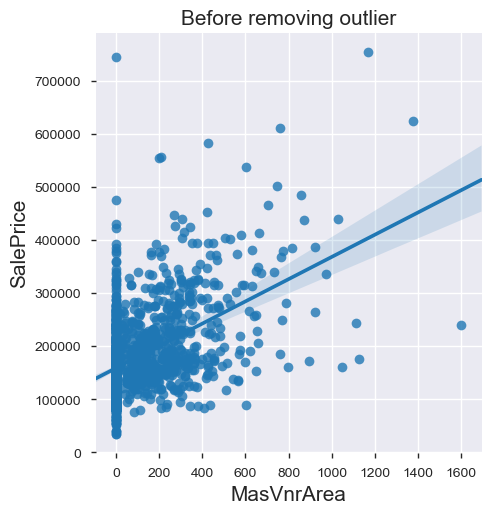

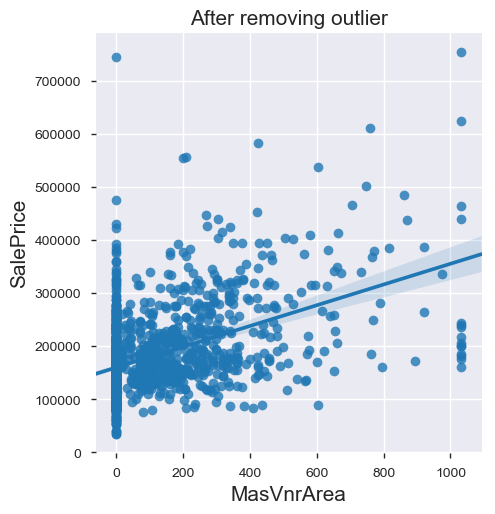

In [13]:
Visualization_fetures('MasVnrArea','SalePrice','Before removing outlier')
train['MasVnrArea']= winsorize(train['MasVnrArea'], limits = 0.01)
Visualization_fetures('MasVnrArea','SalePrice','After removing outlier')

**Cell Report:** In MasVnrArea feature, it is seen that there is a value of Masonry veneer area in square feet is high but crossponding salprice is very low. So it can be considered as outlier and removed by winsorize technique.

**BsmtFinSF1:**

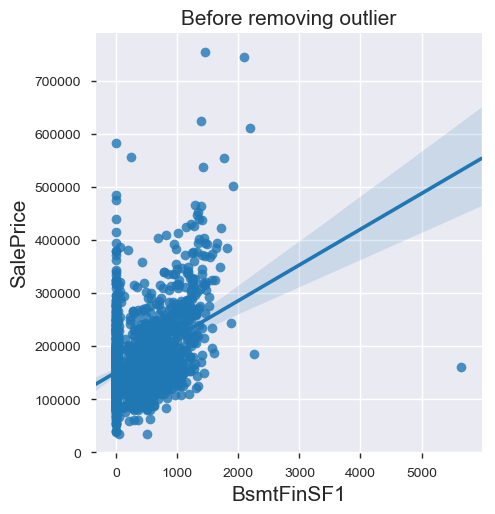

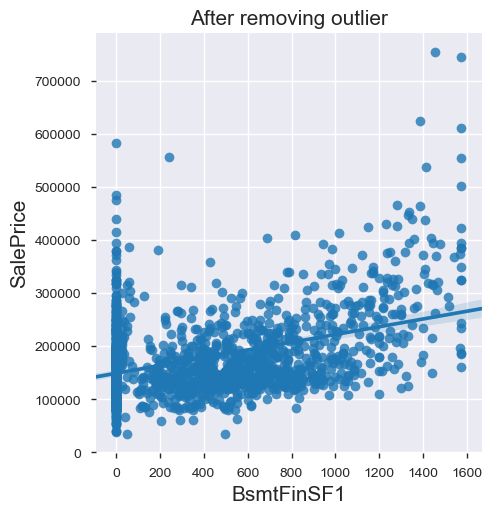

In [16]:
Visualization_fetures('BsmtFinSF1','SalePrice','Before removing outlier')
train['BsmtFinSF1']= winsorize(train['BsmtFinSF1'], limits = 0.01)
Visualization_fetures('BsmtFinSF1','SalePrice','After removing outlier')

**Cell Report:** It is seen in BsmtFinSF1 that there are some values far away from the cluster and considered as outliers. So they are replaced by low extrem value.

**TotalBsmtSF:**

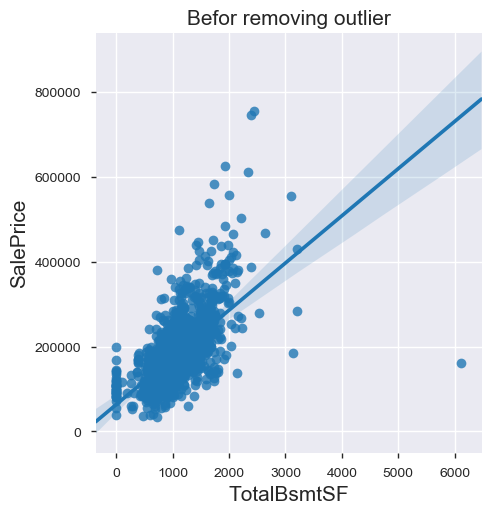

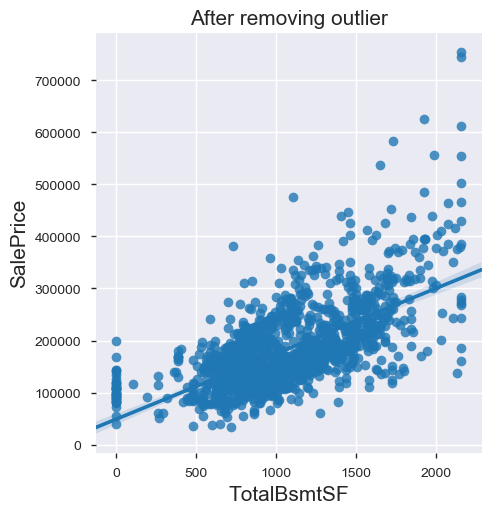

In [17]:
Visualization_fetures('TotalBsmtSF','SalePrice', 'Befor removing outlier')
train['TotalBsmtSF']= winsorize(train['TotalBsmtSF'], limits = 0.01)
Visualization_fetures('TotalBsmtSF','SalePrice','After removing outlier')

**Cell Report:** It is seen in TotalBsmtSF that there is values far away from the cluster and considered as outliers. So they are  replaced by low extrem value.

**LowQualFinSF:**

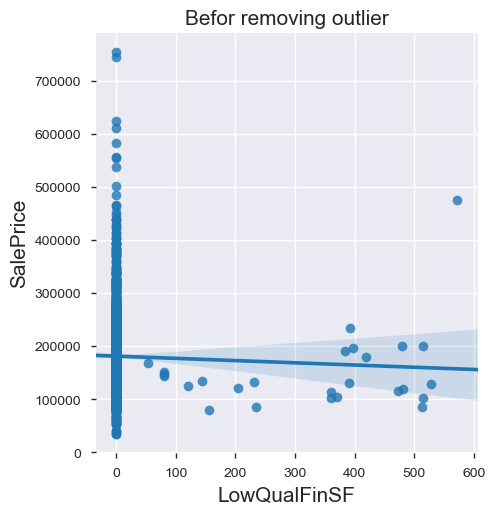

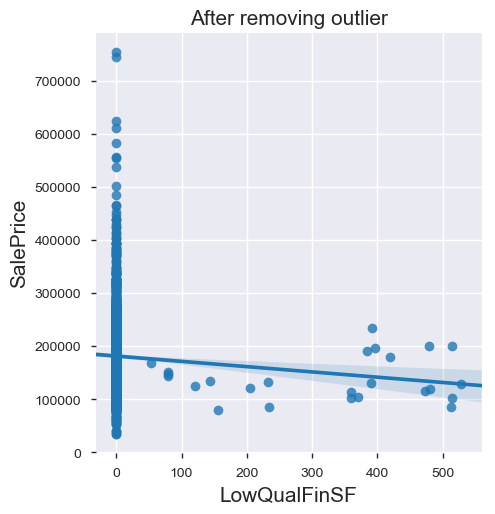

In [18]:
Visualization_fetures('LowQualFinSF','SalePrice','Befor removing outlier')
train = train.drop(train[(train['LowQualFinSF']>550) & 
                         (train['SalePrice']<500000)].index)
Visualization_fetures('LowQualFinSF','SalePrice','After removing outlier')

**Cell Report:** It is seen that there is a value in LowQualFinSF which is outlier and it is dropped.

**GrLivArea:**

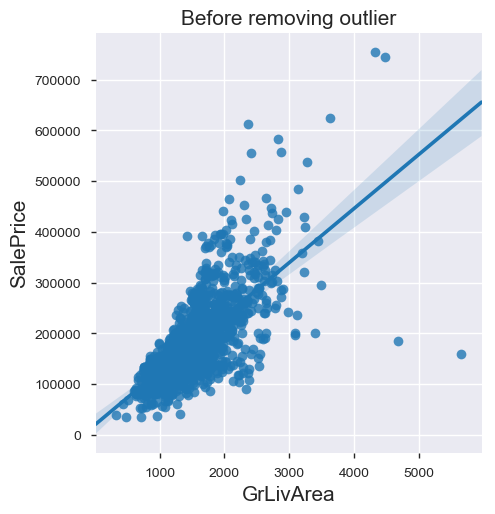

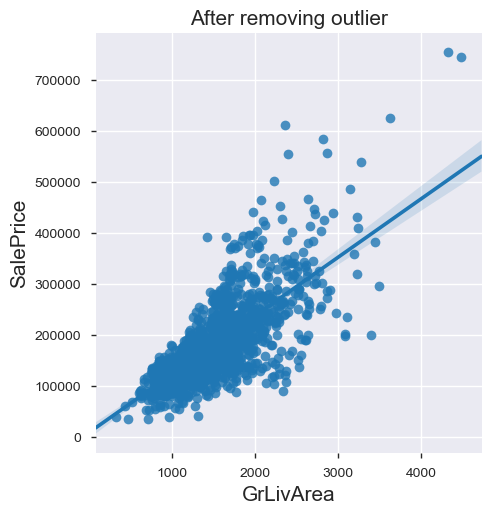

In [19]:
Visualization_fetures('GrLivArea','SalePrice','Before removing outlier')
train = train.drop(train[(train['GrLivArea']>4000) & 
                         (train['SalePrice']<300000)].index)
#train['GrLivArea']= winsorize(train['GrLivArea'], limits = 0.01)
Visualization_fetures('GrLivArea','SalePrice','After removing outlier')

**Cell Report:** It is seen that the bottom right two with extremely large GrLivArea that are of a low price. These values are huge oultliers. Therefore, we can safely delete them.

**GarageArea:**

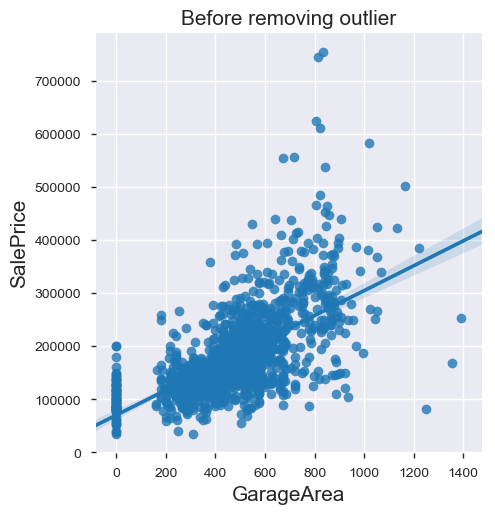

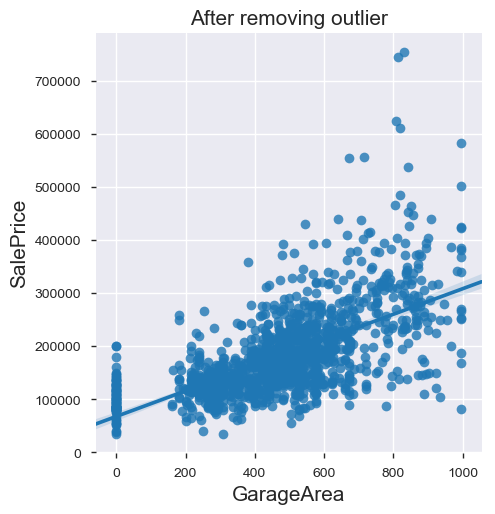

In [20]:
Visualization_fetures('GarageArea','SalePrice','Before removing outlier')
train['GarageArea']= winsorize(train['GarageArea'], limits = 0.01)
Visualization_fetures('GarageArea','SalePrice','After removing outlier')

**Cell Report:** It is seen in GarageArea that there are some values far away from the cluster with low sale price and considered as outliers. So they are replaced by low extrem value.

**OpenPorchSF:**

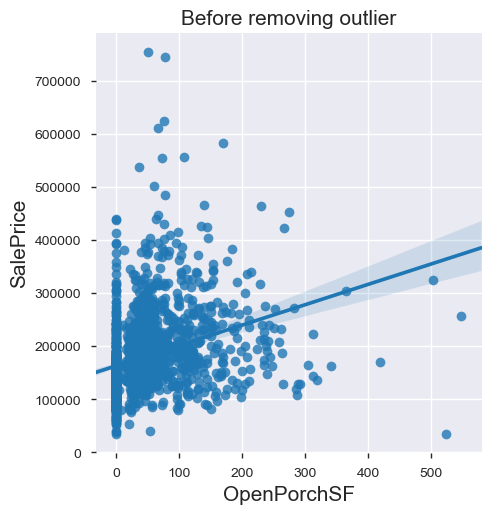

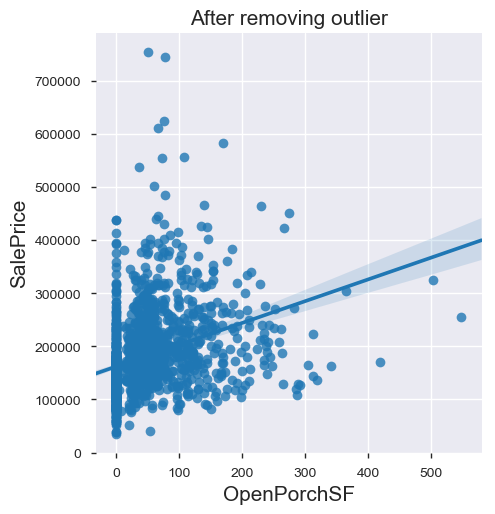

In [21]:
Visualization_fetures('OpenPorchSF','SalePrice','Before removing outlier')
train = train.drop(train[(train['OpenPorchSF']>500) & 
                         (train['SalePrice']<100000)].index)
Visualization_fetures('OpenPorchSF','SalePrice','After removing outlier')

**Cell Report:** It has been seen that there is a OpenPorchSF large value with low price. So, it is outlier and dropped safely.

**EnclosedPorch:**

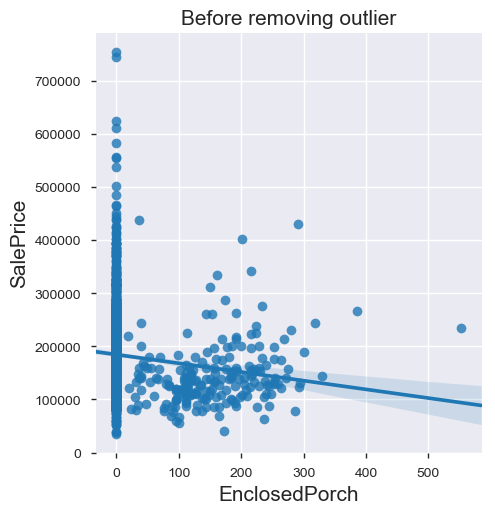

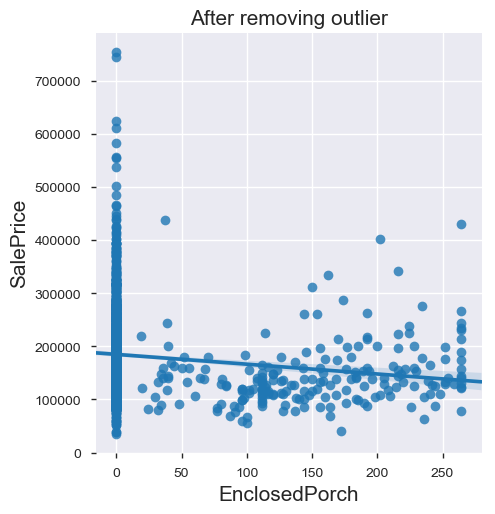

In [22]:
Visualization_fetures('EnclosedPorch','SalePrice','Before removing outlier')
train['EnclosedPorch']= winsorize(train['EnclosedPorch'], limits = 0.01)
Visualization_fetures('EnclosedPorch','SalePrice','After removing outlier')

**Cell Report:** EnclosedPorch has outlies so they are replaced with low extrem value

**LotArea:**

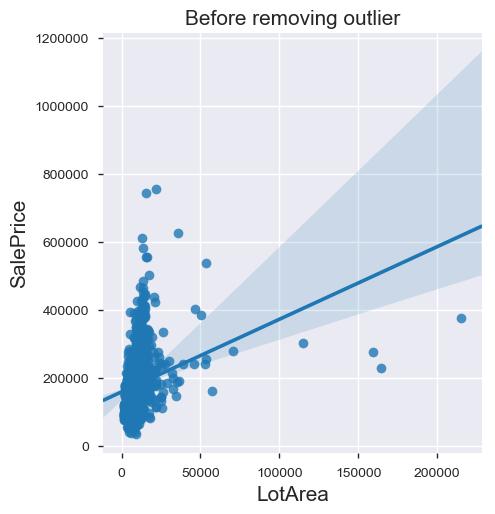

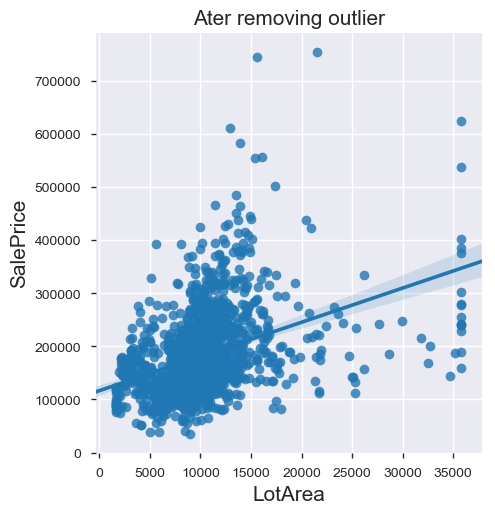

In [23]:
Visualization_fetures('LotArea','SalePrice','Before removing outlier')
train['LotArea']= winsorize(train['LotArea'], limits = 0.01)
Visualization_fetures('LotArea','SalePrice','Ater removing outlier')

**Cell Report:** LotArea has some outliers they are removed by winsorize.

**LotFrontage:**

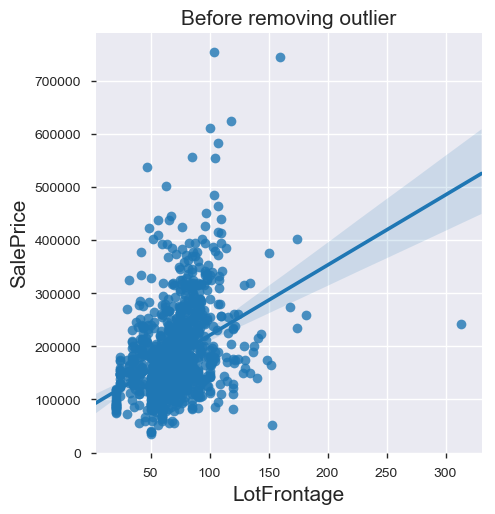

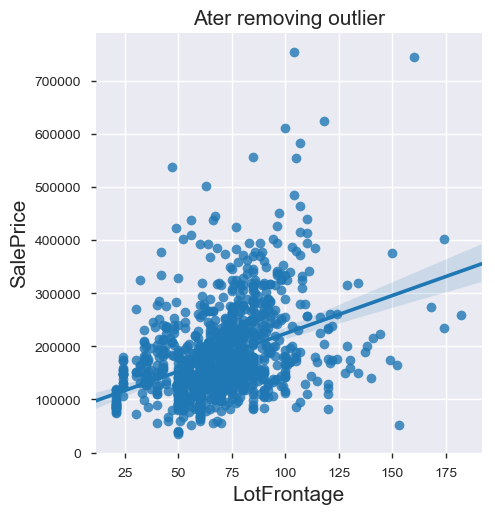

In [24]:
Visualization_fetures('LotFrontage','SalePrice','Before removing outlier')
train = train.drop(train[(train['LotFrontage']>300) &
                         (train['SalePrice']<300000)].index)
Visualization_fetures('LotFrontage','SalePrice','Ater removing outlier')

**Cell Report:** It has been seen that LotFrontage has values far away from cluster.So they are removed safely.

**Outliers are removed successfully**

# 5 Target Variable

**SalePrice** is the target variable that we need to predict. So it is required for machine learning model to do some analysis on this variable for better prediction.

In [30]:
train['SalePrice'].describe()

count      1455.000000
mean     180789.206873
std       79093.464455
min       35311.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


 mu = 180789.21 and sigma = 79066.28



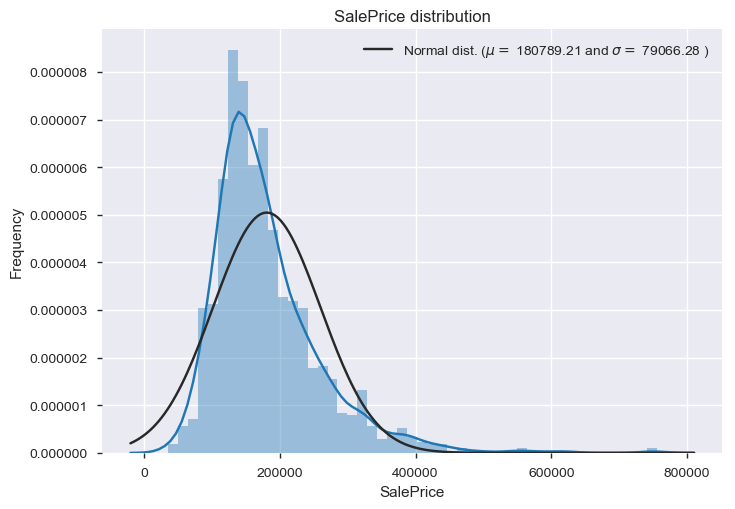

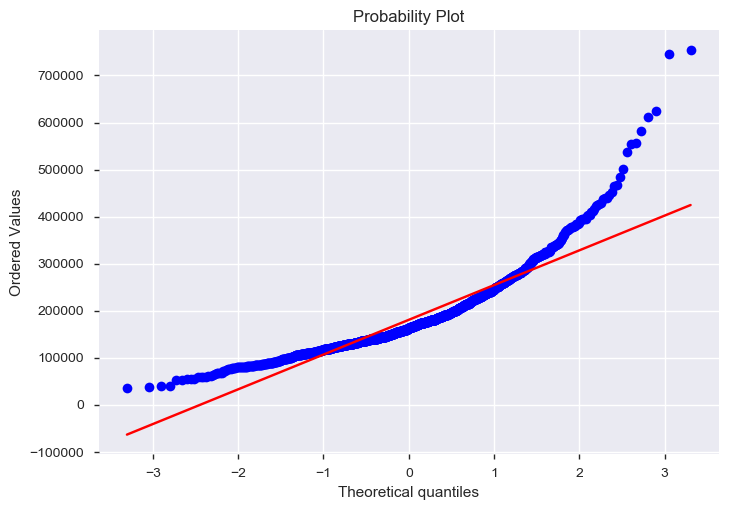

Skewness: 1.888126
Kurtosis: 6.611723


In [31]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

**Cell Report:**


* Skewness of the Target Variable was graphically represented and it was found to be positive skewed and peakedness. This is verified by the fact that the Mean of the Distribution is greater than the Mode.

* The Probability Plot(Similar to Q-Q Plot) also verifies the right skewness of Target Variable. Considering the Standard Deviation, the Random Variables that fall outside (-3,3) are potential outliers.

* As models love normally distributed data ,So we need to transform this variable and make it more normally distributed. Log transformation can be one of the good choice to correct the data.

**Log-transformation of the target variable**


 mu = 12.02 and sigma = 0.40



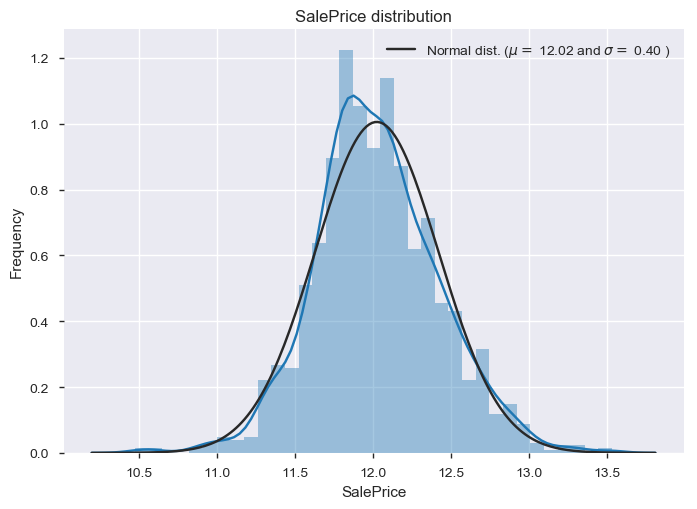

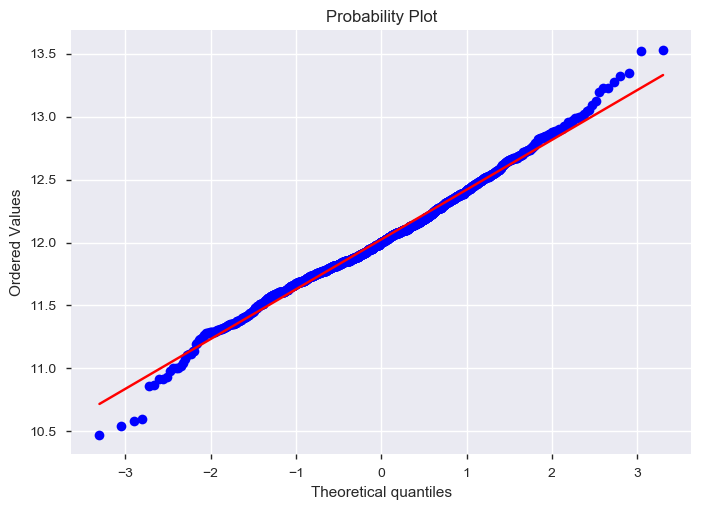

In [32]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

**Cell Report:**
The skew seems now corrected and the data appears more normally distributed.

# 6 Data Correlation

Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases. So, seaborn library is used to visualize the correlation matrix.

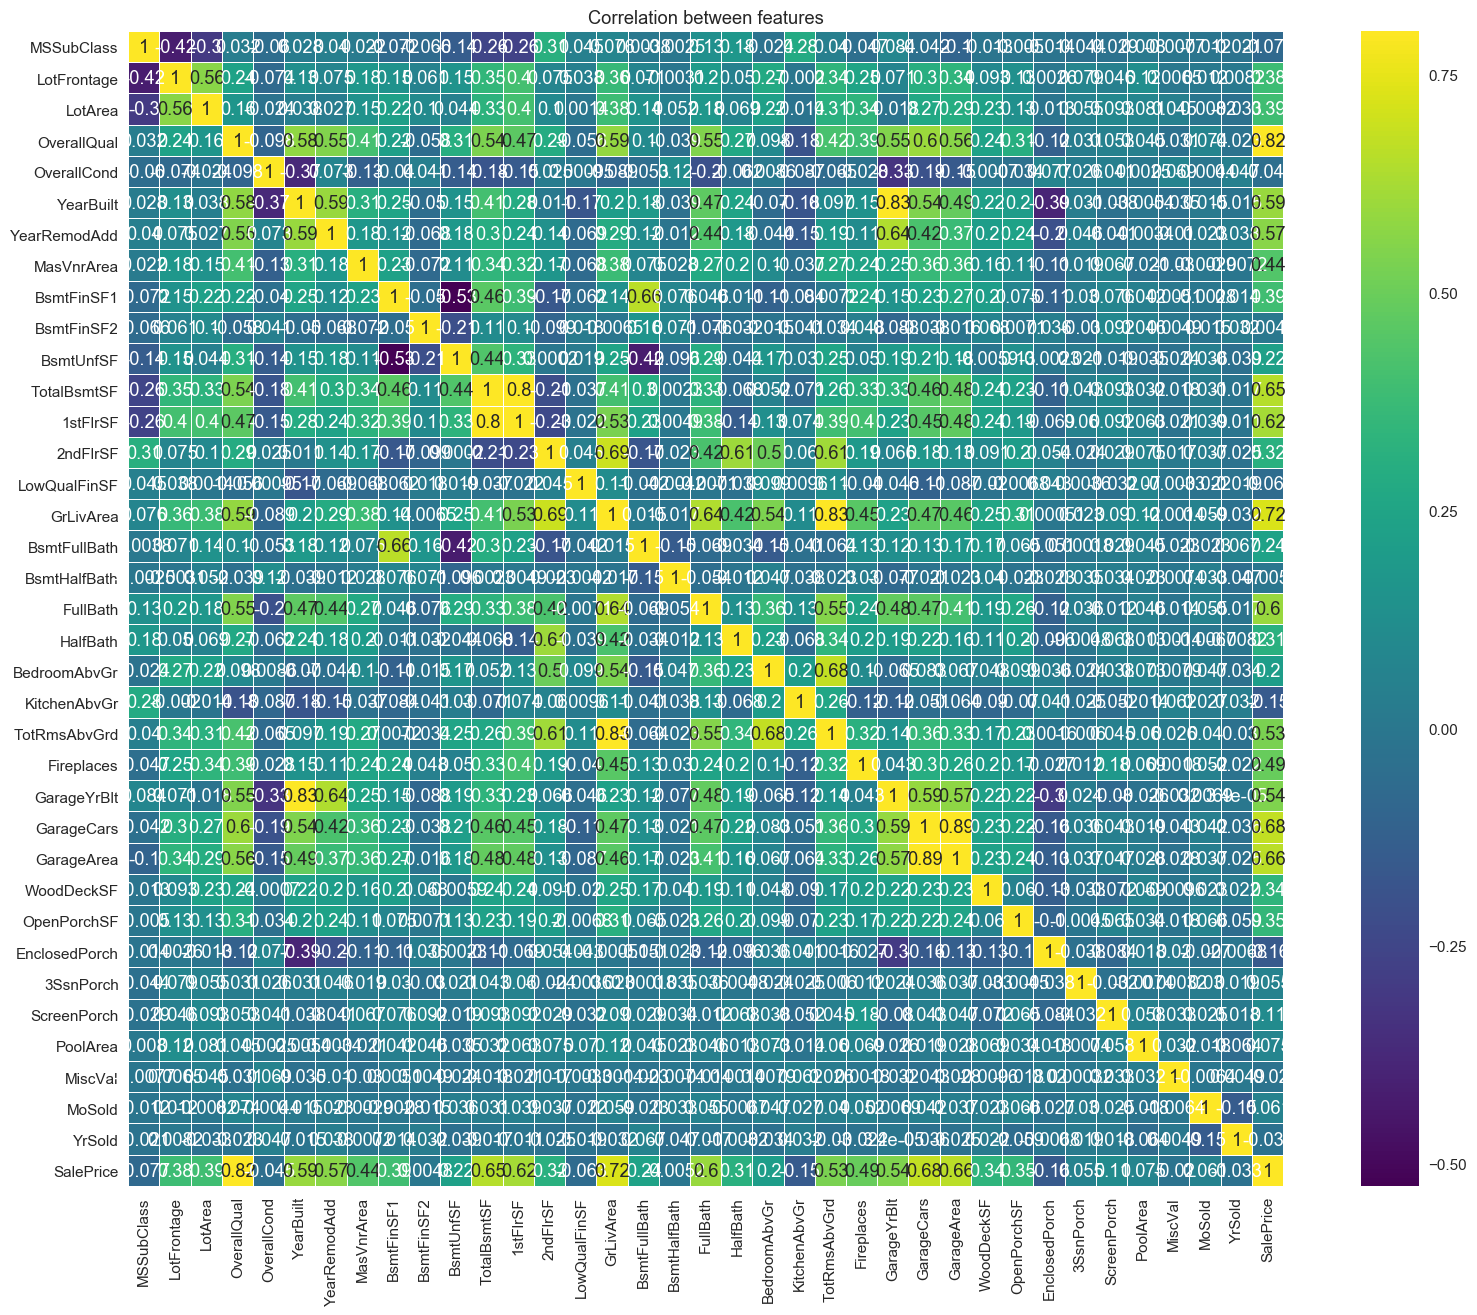

In [33]:
#Correlation map to see how features are correlated with SalePrice
corrMatrix = train.corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(20, 15))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

**Cell Report:** Correlation Matrix describes relation between two variables how they move together or inverse way. in this figure, it is difficult to understand the relationship between them. So, lets see the correlation of few features for better understanding.

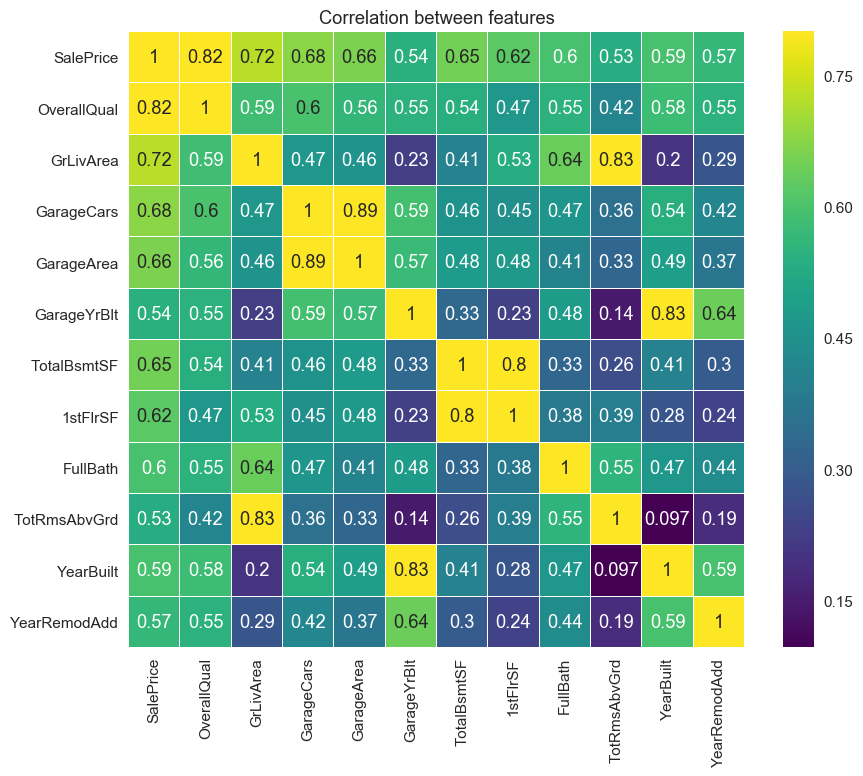

In [34]:
corrMatrix=train[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageArea","GarageYrBlt","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 8))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');


**Cell Report:**


* Heatmap and the most Correlated Features with the Target variable were represented with the Correlation Matrix.

* Some Features that have a high Correlation(>0.8) between them:

 'GarageCars' and 'GarageArea' : 0.88
 
 'GrLivArea' and 'TotRmsAbvGrd' : 0.83

 'YearBuilt' and 'GarageYrBlt' : 0.83

 'TotalBsmtSF' and '1stFlrSF' : 0.82
 
* 'OverallQual' is highly correlated(0.82) with the Target Variable 'SalePrice'.

These are some important observations which can be exploited later on.

## 6.1 Pair Plot
A pairs plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis.


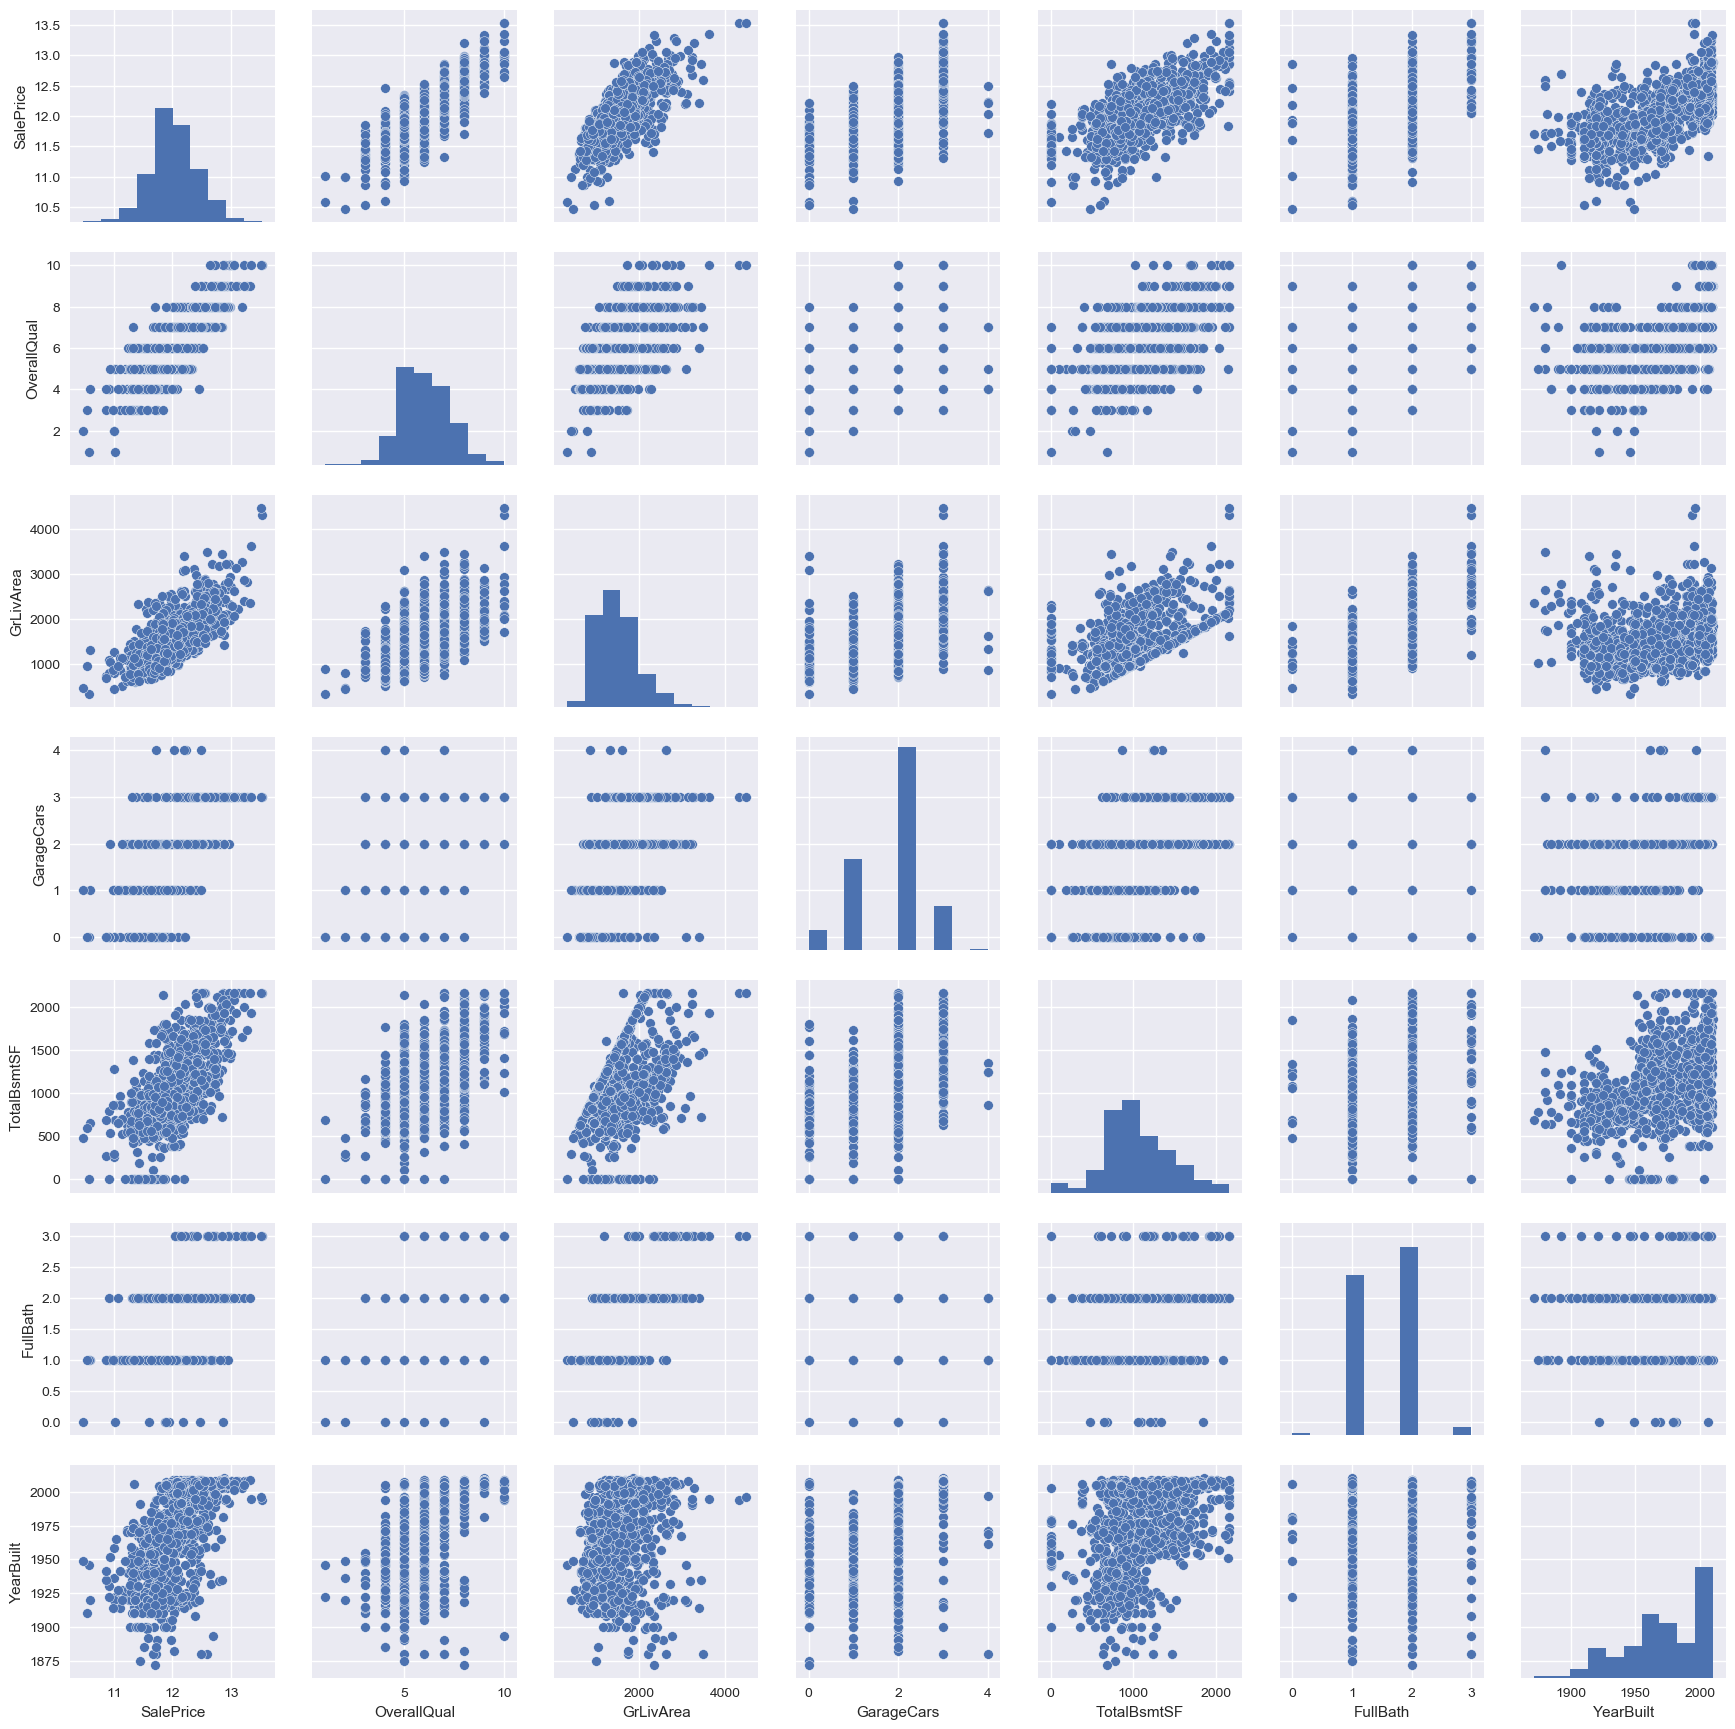

In [35]:
# Pair Plots between 'SalePrice' and most Correlated Variables
sns.set()
CorrFeatures = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars',
                'TotalBsmtSF','FullBath', 'YearBuilt']
sns.pairplot(train[CorrFeatures], size = 2.5)
plt.show()

**Cell Report:**


* Pair Plot are represented to show how the most effective Features are correlated with the Target Variable.

* 'OverallQual' is strongly related with 'SalePrice'.

* 'GrLivArea' and 'TotalBsmtSF' seem to be somewhat linearly related with 'SalePrice'. Both relationships are
   positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF',the slope of the linear relationship is particularly high.
   
* 'SalePrice' is more prone to increase in recent years with 'YearBuilt' features.

# 7 Combine the Train and Test Dataset

Now, we will combine train and test into a single pandas DataFrame. This is so that we can apply all our transformations to both the train and test set in one step and that both the train and the test set will have identical column names. We must first store the SalePrice variable and drop it from train dataset. Since model, evaluation will be done on the log of SalePrice, we go ahead and transform the final home price. We need to transform it back in order to submit.

In [36]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
combine_df = pd.concat((train, test)).reset_index(drop=True)
combine_df.drop(['SalePrice'], axis=1, inplace=True)
print("Combine data frame size is : {}".format(combine_df.shape))

Combine data frame size is : (2914, 79)


**Cell Report:** As target value and ID was dropped, we see that there are 79 features and 2914 obsevations in total.Now our next steps is to get ride of missing values.

# 8 Missing Data Analysis

Missing values are a common occurrence, and we need to have a strategy for treating them. A missing value can signify a number of different things in our data. Perhaps the data was not available or not applicable or the event did not happen. It could be that the person who entered the data did not know the right value, or missed filling in. It is a very challenging task to get ride of missing values. Data mining methods vary in the way for treating missing values. Typically, ignoring the missing values, or exclude any records containing missing values, or replace missing values with the mean, or infer missing values from existing values. In this session, we tried to get ride of mising values by replacing them with mean, mood etc.

## 8.1 Findout Missing Value

In [37]:
import missingno as msno

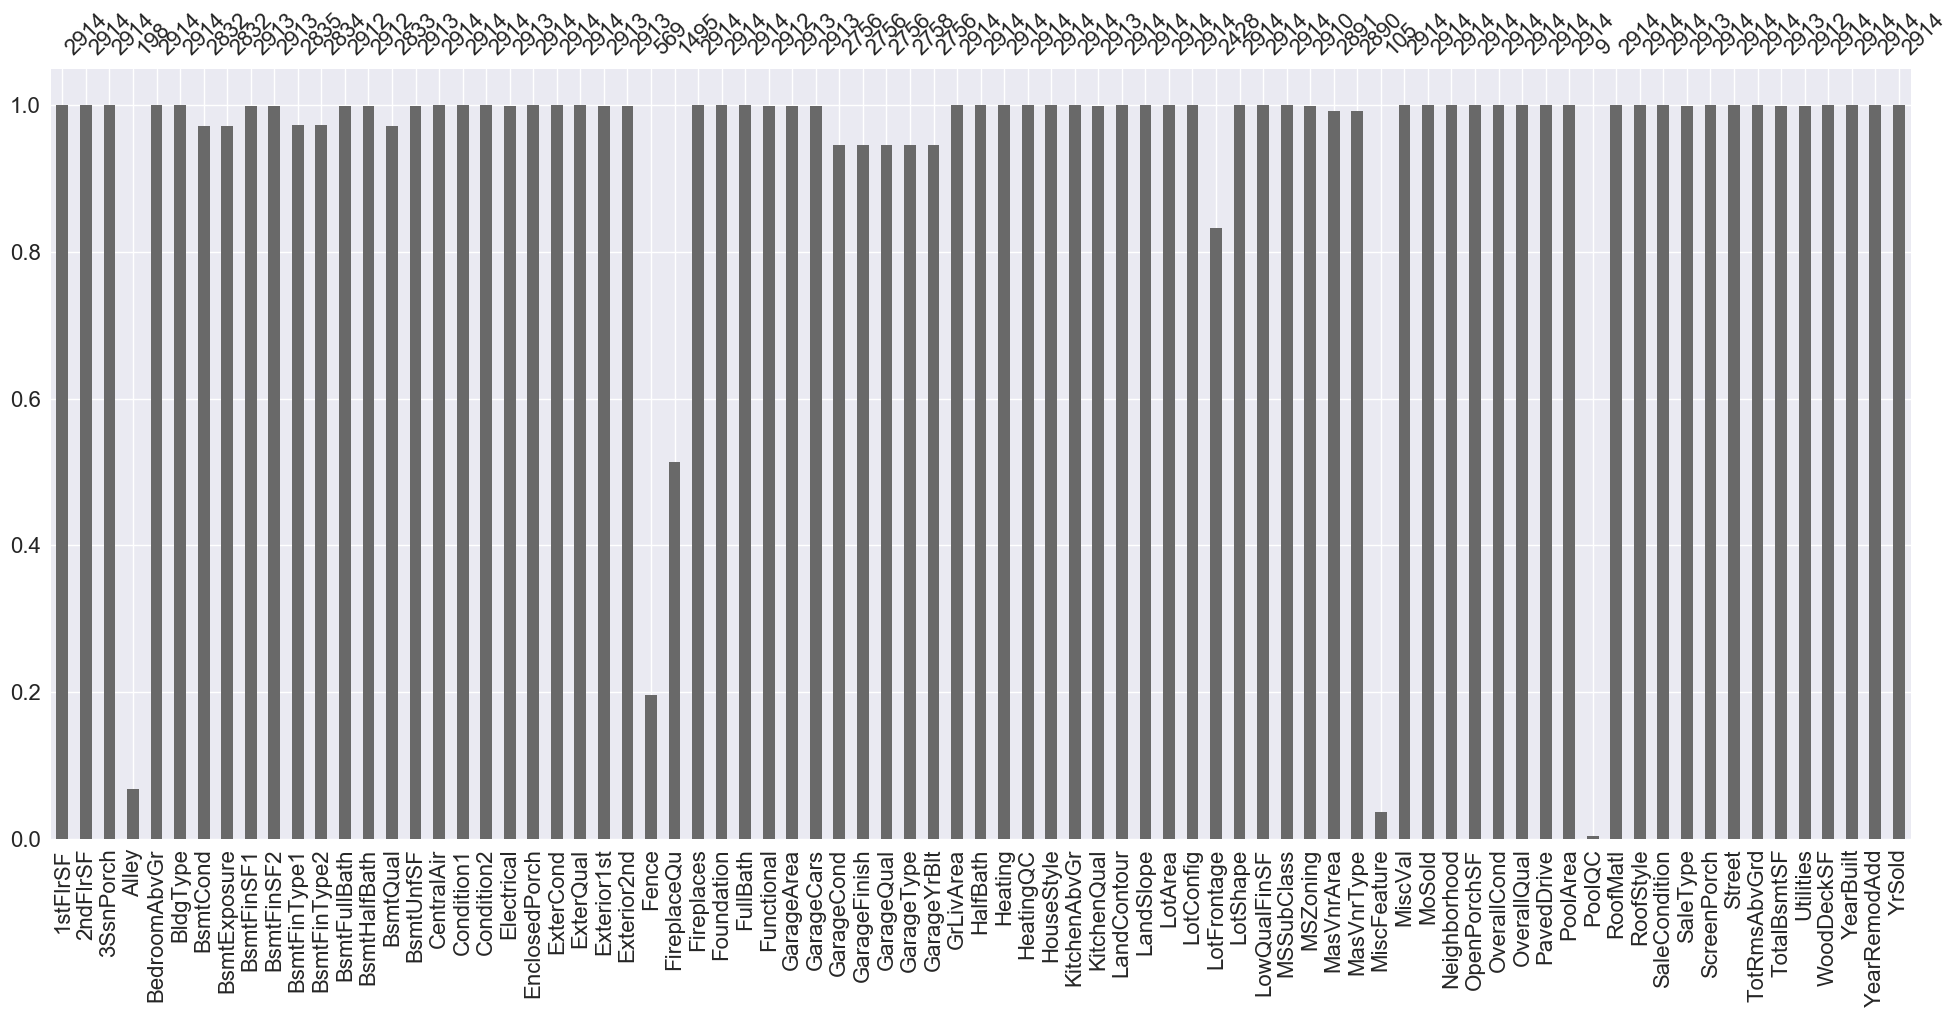

In [38]:
msno.bar(combine_df.sample(len(combine_df)),n=10,sort='ascending');

**Cell Report:**
The bar plot gives the information about completness of data with number. It has been seen that most of the data are completed. There are some features which are not perfectly completed.
**Allay, Fence, MiscFeature, PoolQC** have highly missing data which are clearly noticable.
 

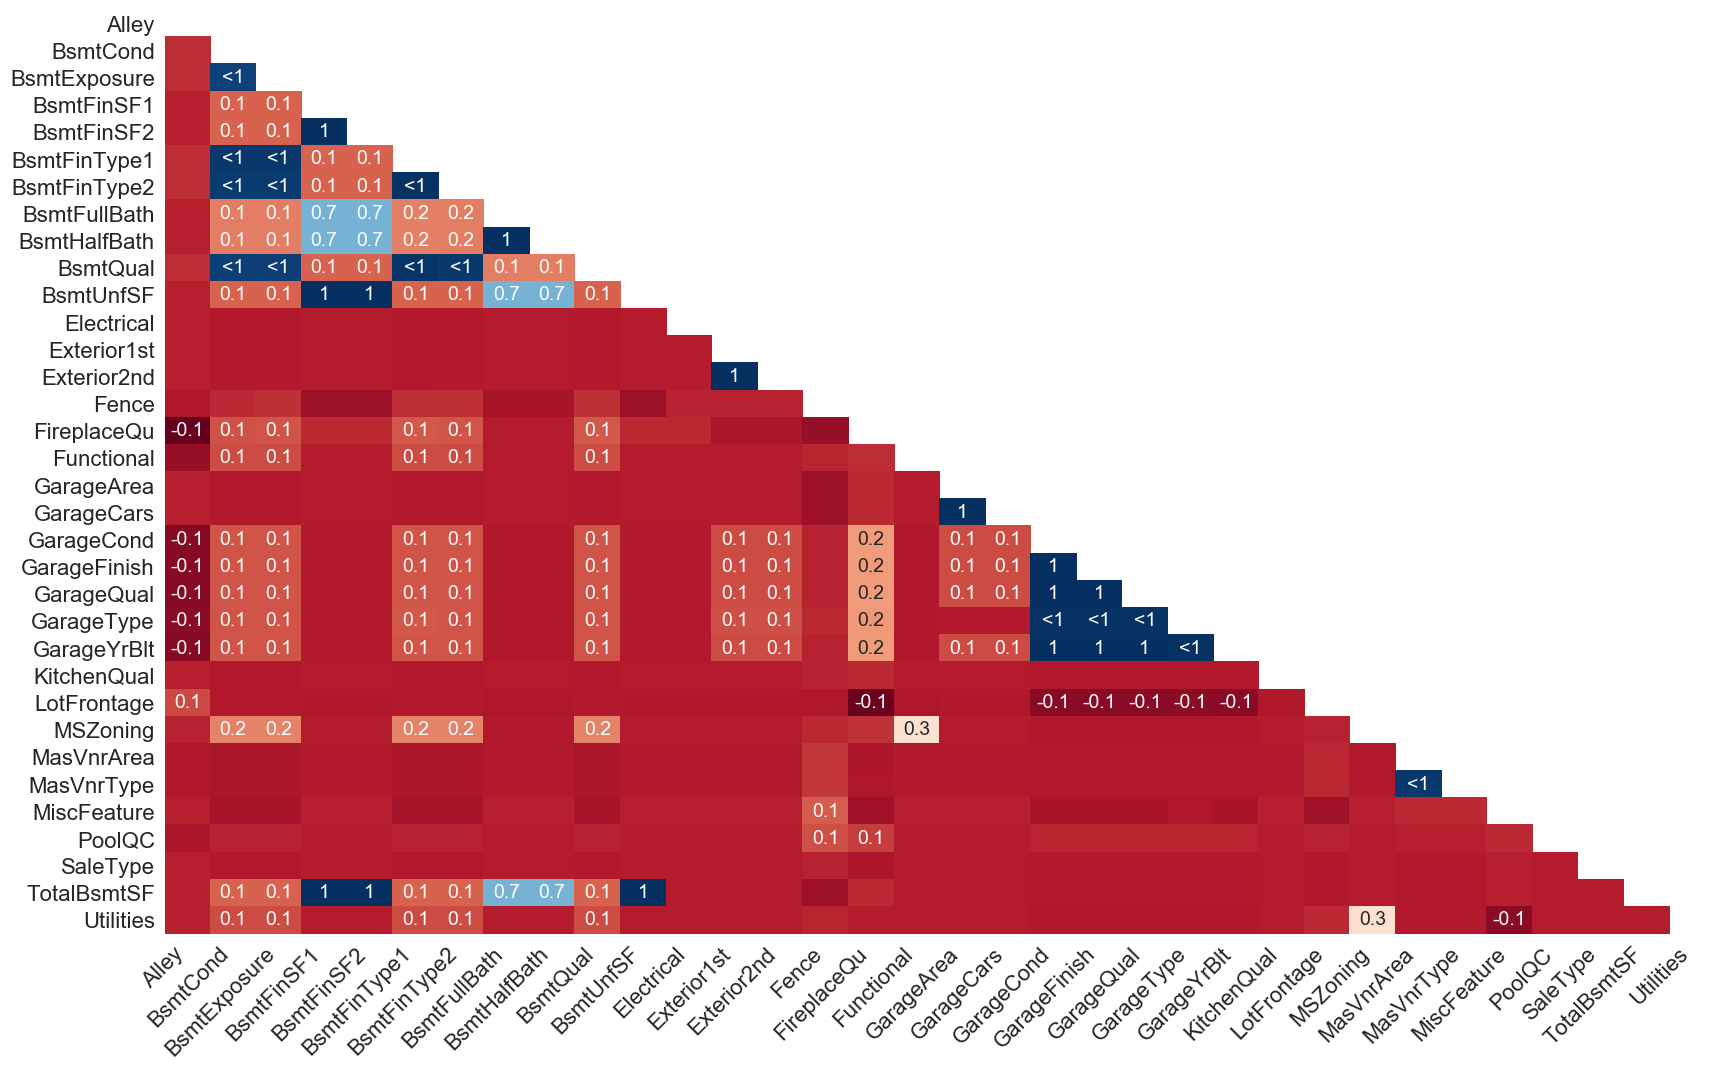

In [39]:
msno.heatmap(combine_df);

**Cell Report:**



* The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another. Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization. Perticularly, Exterior1st and SaleType has no coerelation for missing values.

*  A value of -1 means that in all cases, when the first column is missing then the second column is not missing. A value of 1 means that in all cases, when the first column is missing the second column is missing also. In the shelter animal outcomes dataset, A value of 0 represents no correlation at all. In this heatmap, TotalBsmtSF and BsmtFinSF1 has coerelation 1, that means both columns have missing values.

* Entries marked <1 or >-1 are have a correlation that is close to being exactingly negative or positive, but is still not quite perfectly. For example, GarageCond and GarageType.


**Number of missing values:**

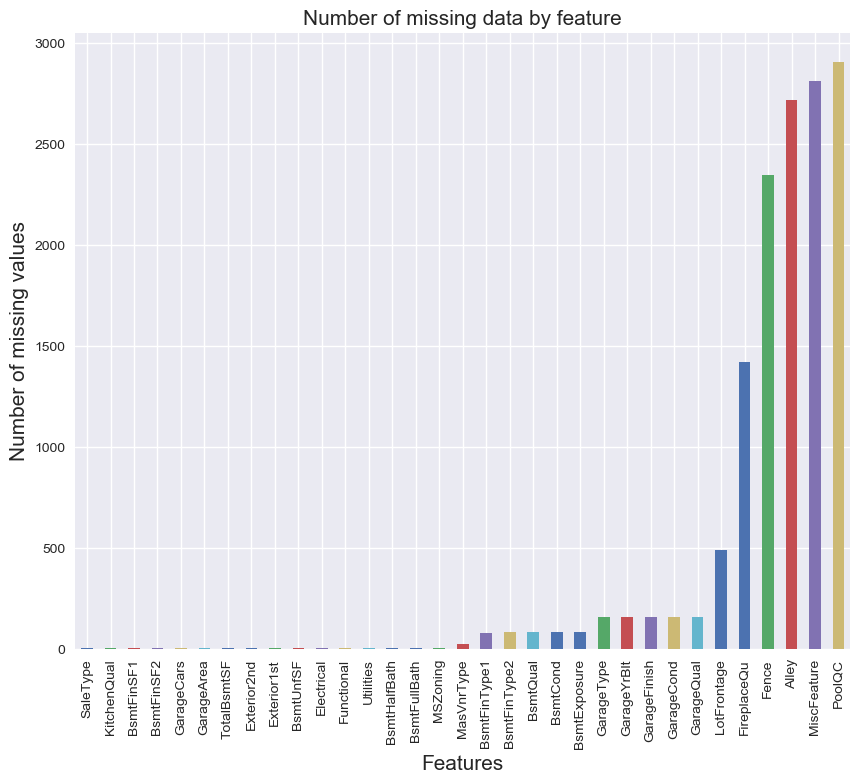

In [39]:
missing = combine_df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
plt.figure(figsize=(10,8))
missing.plot.bar()
plt.xlabel('Features', fontsize=15)
plt.ylabel('Number of missing values', fontsize=15)
plt.title('Number of missing data by feature', fontsize=15);

**Cell Report:**



* It seems that there are many missing values in the dataset. Alley, MiscFeature,PoolQC has more than 2500 missing values. Fence has more than 2000 missing values.

* Before fedding the dataset to model, we need to impute the missing values with approriate ways.

**Percent missing data by feature**

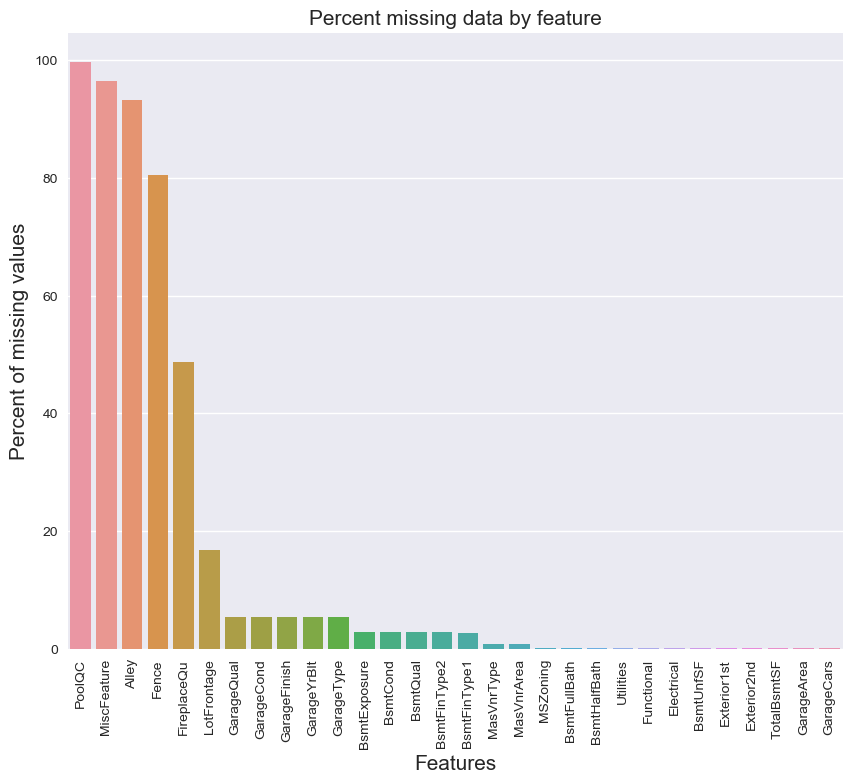

In [40]:
combine_df_na = (combine_df.isnull().sum() / len(combine_df)) * 100
combine_df_na = combine_df_na.drop(combine_df_na[combine_df_na == 0].index
                                  ).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :combine_df_na})
missing_data.head(10);

f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='90')
sns.barplot(x=combine_df_na.index, y=combine_df_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15);

**Cell Report:**



* Alley has 198 data out of 2914, that means 93.2 percent data are missing.

* Fence has 569 data out of 2914, that means 80.4 percent data are missing.

* MiscFeature has 105 data out of 2914, that means 96.4 percent data are missing.

* PoolQC has only 9 data out of 2914, that means 99.69 percent data are missing.

## 8.2 Imputing Missing Values

We shall impute them by proceeding sequentially through features with missing values.For the remaining features, we shall fill the missing ones according to 3 rules:

1.By first checking the data description text file to see what missing values means

2.By filling missing data with most popular value if the feature is categorical

3.By filling missing data with the mean value if the feature is numerical


**PoolQC:**

Number of missing value: 2905
Ex    4
Gd    3
Fa    2
Name: PoolQC, dtype: int64


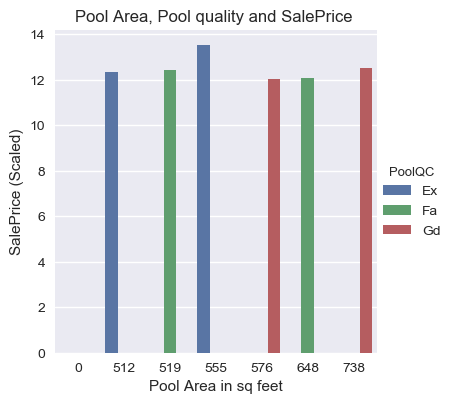

In [42]:
missingValue = combine_df["PoolQC"].isnull().sum().sum()
print("Number of missing value:",missingValue)
print(combine_df["PoolQC"].value_counts())

sns.factorplot("PoolArea","SalePrice",data=train,hue="PoolQC",kind='bar')
plt.title("Pool Area, Pool quality and SalePrice ")
plt.ylabel("SalePrice (Scaled)")
plt.xlabel("Pool Area in sq feet");


In [43]:
combine_df["PoolQC"] = combine_df["PoolQC"].fillna("None")

**Cell Report:** 

If PoolArea is 0, that means that house doesn't have a pool.
So we can replace PoolQuality with None.
PoolQC data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.So we can impute the PoolQC missing value by None.

**MiscFeature :**

Number of missing value: 2809
Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64


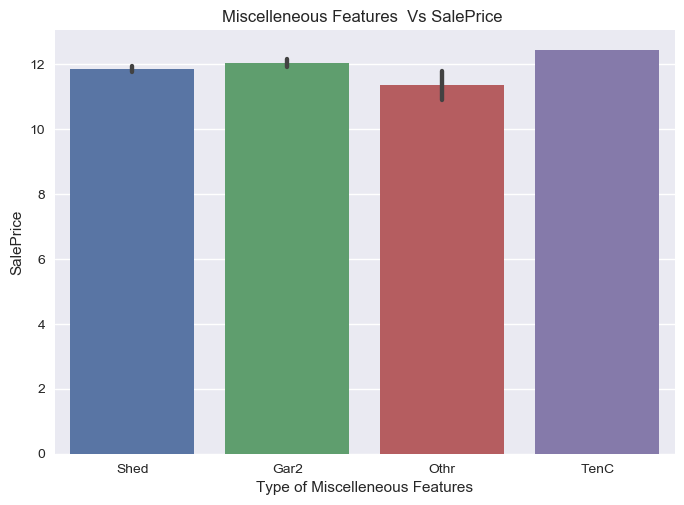

In [44]:
missingValue = combine_df["MiscFeature"].isnull().sum().sum()
print("Number of missing value:",missingValue)
print(combine_df["MiscFeature"].value_counts())

sns.barplot(train["MiscFeature"],train["SalePrice"])
plt.title("Miscelleneous Features  Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Type of Miscelleneous Features");


In [45]:
combine_df["MiscFeature"] = combine_df["MiscFeature"].fillna("None")

**Cell Report:** MiscFeature data description says NA means "no misc feature".So,imputed by 'None'

**Alley:**

Number of missing value: 2716
Grvl    120
Pave     78
Name: Alley, dtype: int64


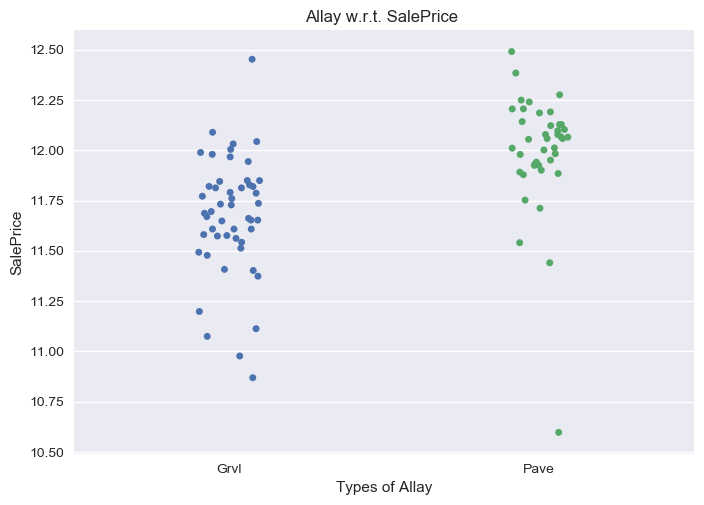

In [46]:
missingValue = combine_df["Alley"].isnull().sum().sum()
print("Number of missing value:",missingValue)
print(combine_df["Alley"].value_counts())

sns.stripplot(x=train["Alley"], y=train["SalePrice"],jitter=True);
plt.title("Allay w.r.t. SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Types of Allay");

In [47]:
combine_df["Alley"] = combine_df["Alley"].fillna("None")

**Cell Report:** Data description says NA means "no alley access". All missing value indicate that particular house doesn't have an alley access.So,we can replace it with 'None'.

**Fence :**

Number of missing value: 0
None    2716
Grvl     120
Pave      78
Name: Alley, dtype: int64


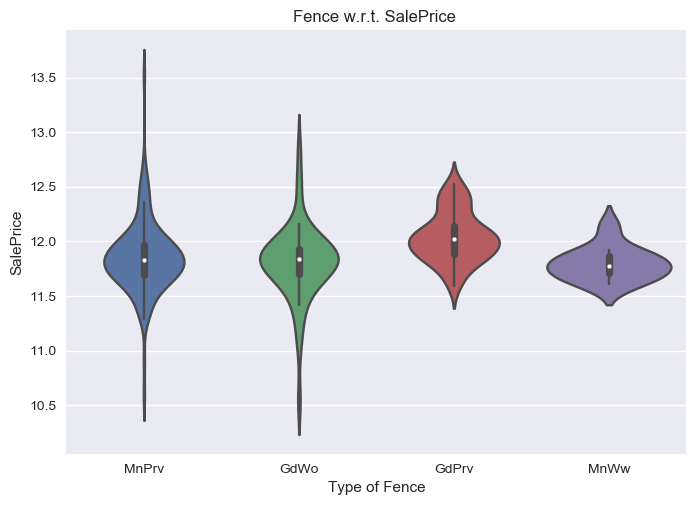

In [48]:
missingValue = combine_df["Alley"].isnull().sum().sum()
print("Number of missing value:",missingValue)
print(combine_df["Alley"].value_counts())

sns.violinplot(train["Fence"],train["SalePrice"])
plt.title("Fence w.r.t. SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Type of Fence");

In [49]:
combine_df["Fence"] = combine_df["Fence"].fillna("None")

**Cell Report:** Fence data description says NA means "no fence".Missing value replace by "None".

**Fireplaces and FireplaceQu :**

Number of missing value in FireplaceQu: 1419
Gd    741
TA    591
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64


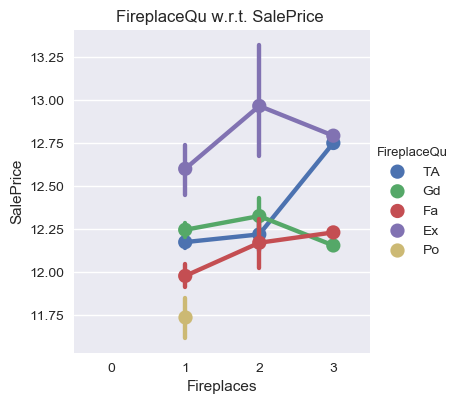

In [50]:
missingValue = combine_df["FireplaceQu"].isnull().sum().sum()
print("Number of missing value in FireplaceQu:",missingValue)
print(combine_df["FireplaceQu"].value_counts())

sns.factorplot("Fireplaces","SalePrice",data=train,hue="FireplaceQu");
plt.title("FireplaceQu w.r.t. SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Fireplaces");

In [51]:
combine_df["FireplaceQu"] = combine_df["FireplaceQu"].fillna("None")

**Cell report:** Fireplaces and FireplaceQu data description says NA means "no fireplace"

**LotFrontage :** 

Number of missing value: 486
count    2428.000000
mean       69.860379
std        21.027712
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       200.000000
Name: LotFrontage, dtype: float64


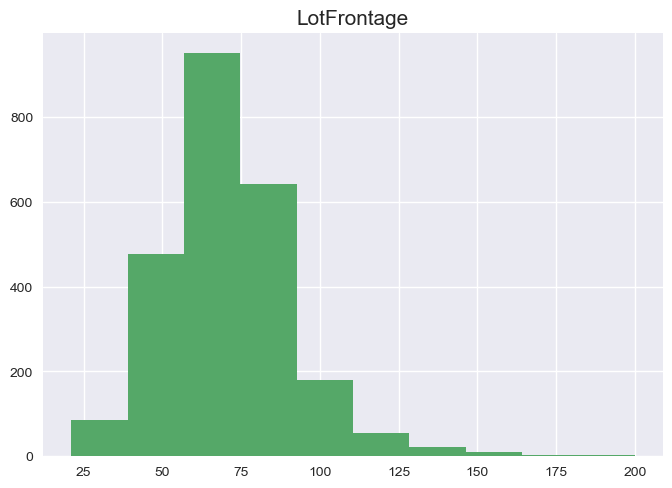

In [52]:
missingValue = combine_df["LotFrontage"].isnull().sum().sum()
print("Number of missing value:",missingValue)
print(combine_df["LotFrontage"].describe())
combine_df["LotFrontage"].hist()
combine_df["LotFrontage"].hist()
plt.title('LotFrontage', fontsize=15)
plt.show()

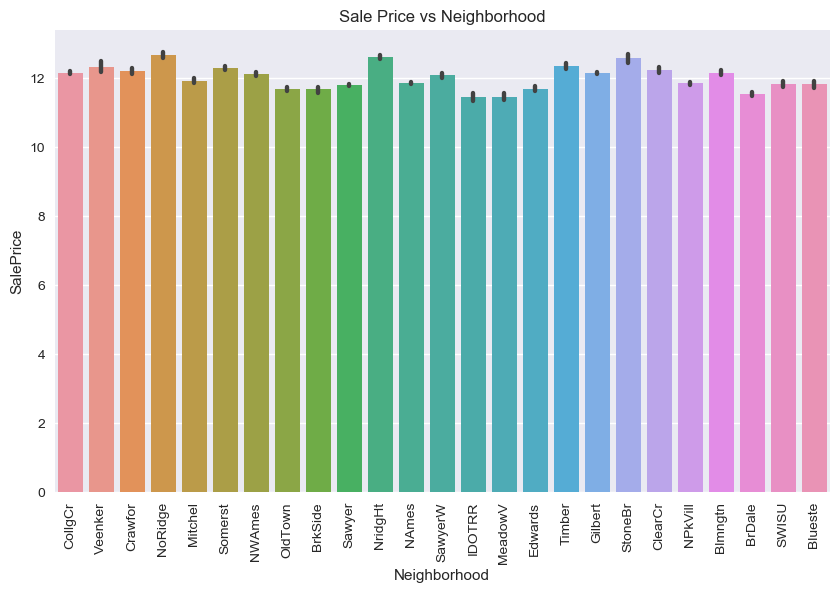

In [53]:
plt.figure(8, figsize=(10, 6))
sns.barplot(train["Neighborhood"],train["SalePrice"])
plt.xticks(rotation=90)
plt.title("Sale Price vs Neighborhood");

In [54]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
combine_df["LotFrontage"] = combine_df.groupby("Neighborhood")[
                    "LotFrontage"].transform(lambda x: x.fillna(x.median()))

**Cell Report:** Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.


**GarageType, GarageFinish, GarageQual and GarageCond : **

In [55]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    combine_df[col] = combine_df[col].fillna('None')

**Cell Report:**
Garage Documentation say that NA means no Garage.So Replacing missing data with None

**GarageYrBlt, GarageArea and GarageCars :**

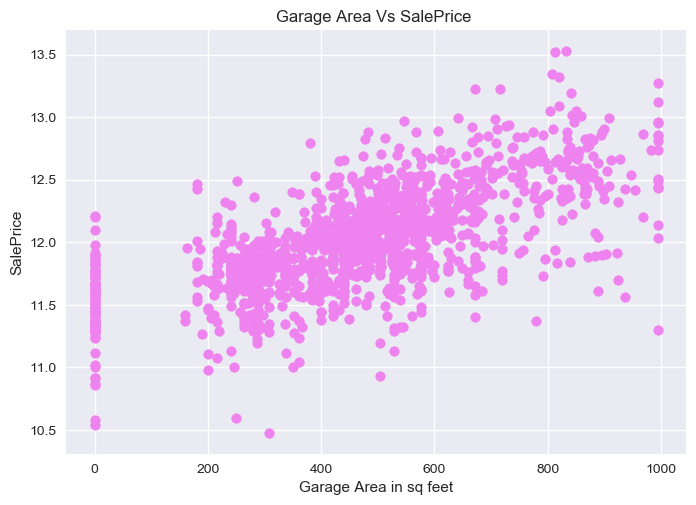

In [56]:
plt.scatter(train.GarageArea, train["SalePrice"].values,color='violet')
plt.title("Garage Area Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Garage Area in sq feet");

Number of missing value: 1
2.0    1592
1.0     776
3.0     372
0.0     156
4.0      16
5.0       1
Name: GarageCars, dtype: int64


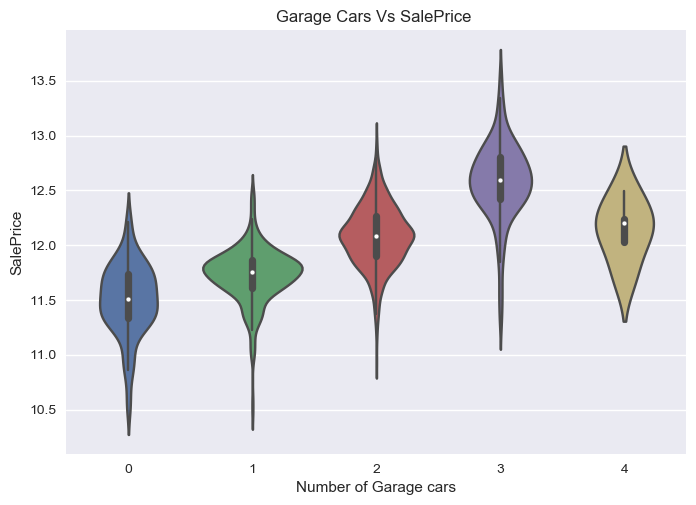

In [57]:
missingValue = combine_df["GarageCars"].isnull().sum().sum()
print("Number of missing value:",missingValue)
print(combine_df["GarageCars"].value_counts())

sns.violinplot(train["GarageCars"],train["SalePrice"])
plt.title("Garage Cars Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Number of Garage cars");

In [58]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    combine_df[col] = combine_df[col].fillna(0)

**Cell Report:** Missing values of GarageYrBlt, GarageArea and GarageCars are  Replaced with 0 (Since No garage = no cars in such garage.)

**BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath :**

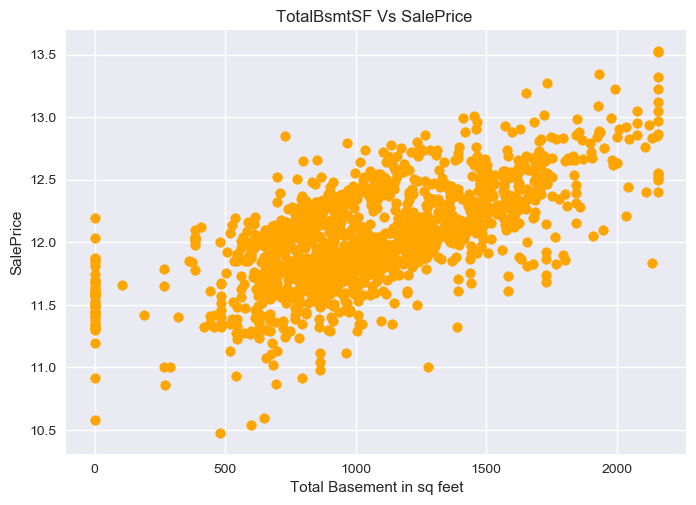

In [59]:
plt.scatter(train['TotalBsmtSF'], train["SalePrice"].values,color='orange')
plt.title("TotalBsmtSF Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement in sq feet");

In [60]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF',
            'BsmtFullBath', 'BsmtHalfBath'):
    combine_df[col] = combine_df[col].fillna(0)

** Cell report:** Missing values of BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath are likely zero for having no basement

**BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 :**
For all these categorical basement-related features, NaN means that there is no basement.So, we can impute None.

In [61]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    combine_df[col] = combine_df[col].fillna('None')

**MasVnrArea and MasVnrType :**

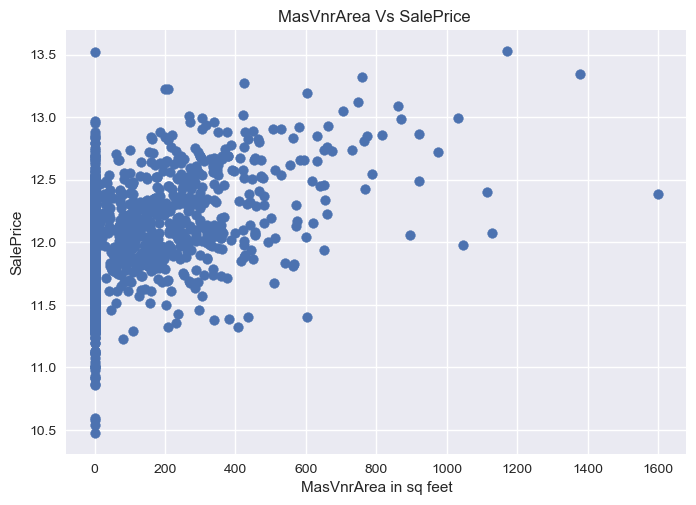

In [62]:
plt.scatter(train["MasVnrArea"],train["SalePrice"])
plt.title("MasVnrArea Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("MasVnrArea in sq feet");

Number of missing value: 24
None       1739
BrkFace     879
Stone       247
BrkCmn       25
Name: MasVnrType, dtype: int64


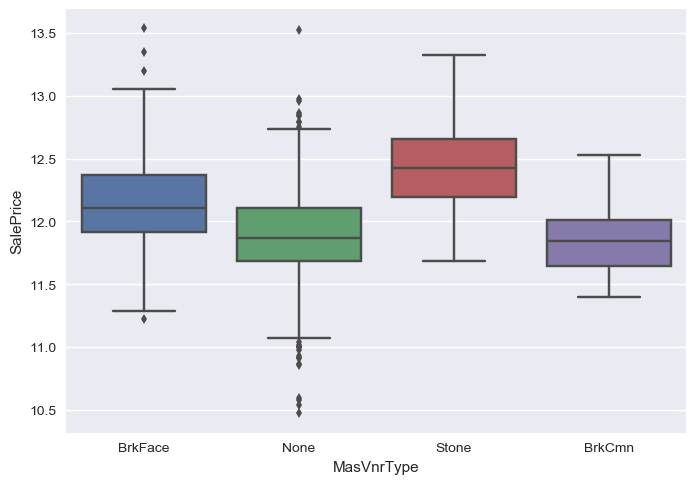

In [63]:
missingValue = combine_df["MasVnrType"].isnull().sum().sum()
print("Number of missing value:",missingValue)
print(combine_df["MasVnrType"].value_counts())
sns.boxplot("MasVnrType","SalePrice",data=train);

In [64]:
combine_df["MasVnrType"] = combine_df["MasVnrType"].fillna("None")
combine_df["MasVnrArea"] = combine_df["MasVnrArea"].fillna(0)

**Cell Report:** In MasVnrArea and MasVnrType, NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

**MSZoning (The general zoning classification) :**

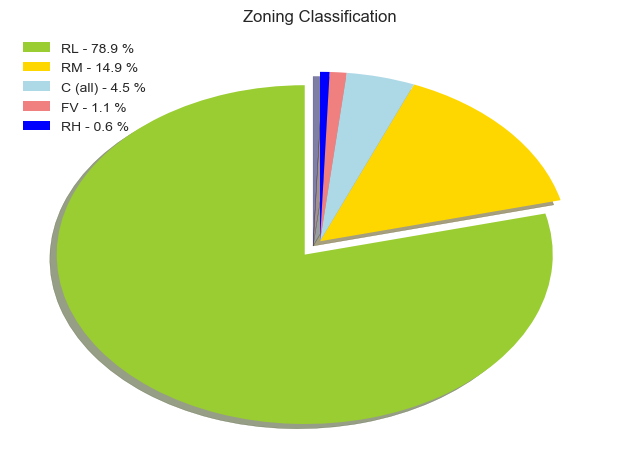

Number of missing value: 4
RL         1148
RM          217
FV           65
RH           16
C (all)       9
Name: MSZoning, dtype: int64


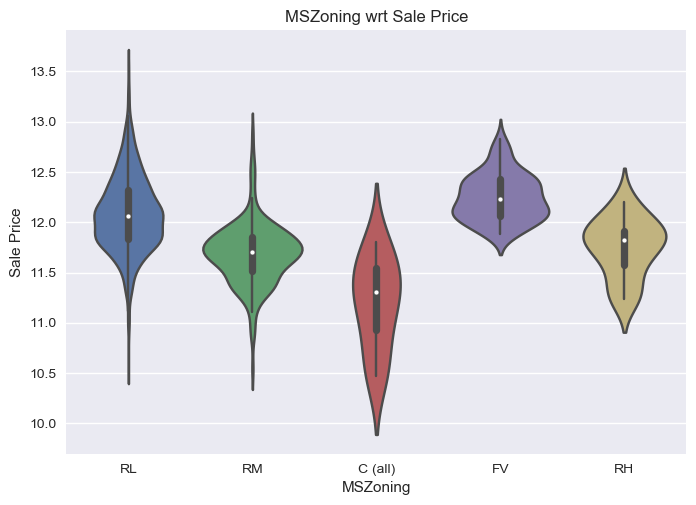

In [65]:
labels = train["MSZoning"].unique()
sizes = train["MSZoning"].value_counts().values
explode=[0.1,0,0,0,0]
parcent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

colors = ['yellowgreen', 'gold', 'lightblue', 'lightcoral','blue']
patches, texts= plt.pie(sizes, colors=colors,explode=explode,
                        shadow=True,startangle=90)
plt.legend(patches, labels, loc="best")
plt.title("Zoning Classification")
plt.show()

missingValue = combine_df["MSZoning"].isnull().sum().sum()
print("Number of missing value:",missingValue)
print(train["MSZoning"].value_counts())
sns.violinplot(train.MSZoning,train["SalePrice"])
plt.title("MSZoning wrt Sale Price")
plt.xlabel("MSZoning")
plt.ylabel("Sale Price");

In [66]:
combine_df['MSZoning'] = combine_df['MSZoning'].fillna(
                                   combine_df['MSZoning'].mode()[0])

**Cell Report:** 'RL' is by far the most common value. So we can fill in missing values with mood.

**Utilities :** 

Number of missing value: 2
AllPub    2911
NoSeWa       1
Name: Utilities, dtype: int64


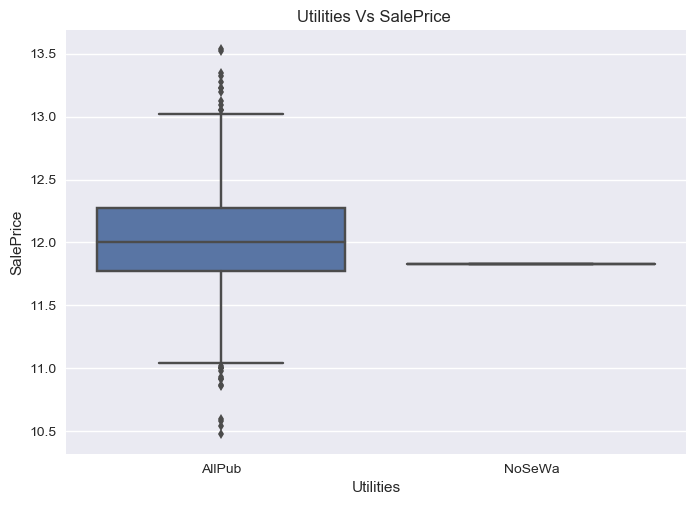

In [67]:
missingValue = combine_df["Utilities"].isnull().sum().sum()
print("Number of missing value:",missingValue)
print(combine_df["Utilities"].value_counts())

sns.boxplot("Utilities","SalePrice",data=train)
plt.title("Utilities Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Utilities");

In [68]:
combine_df = combine_df.drop(['Utilities'], axis=1)

**Cell Report:**
For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove Utilities because of unbalanced data.

**Functional :**

Number of missing value: 2
Typ     2712
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64


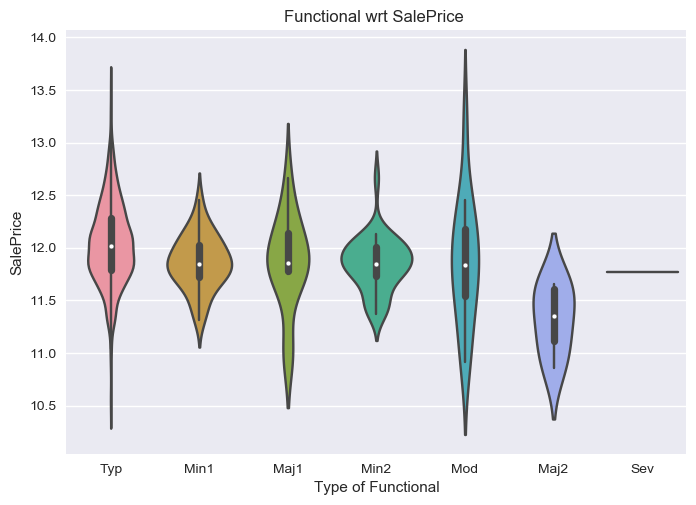

In [69]:
missingValue = combine_df["Functional"].isnull().sum().sum()
print("Number of missing value:",missingValue)
print(combine_df["Functional"].value_counts())

sns.violinplot(train["Functional"],train["SalePrice"])
plt.title("Functional wrt SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Type of Functional");

In [70]:
combine_df["Functional"] = combine_df["Functional"].fillna("Typ")

**Cell Report:** Functional data description says NA means typical. So,imputed by Typ.

**Electrical :**

Number of missing value: 1
SBrkr    2667
FuseA     187
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64


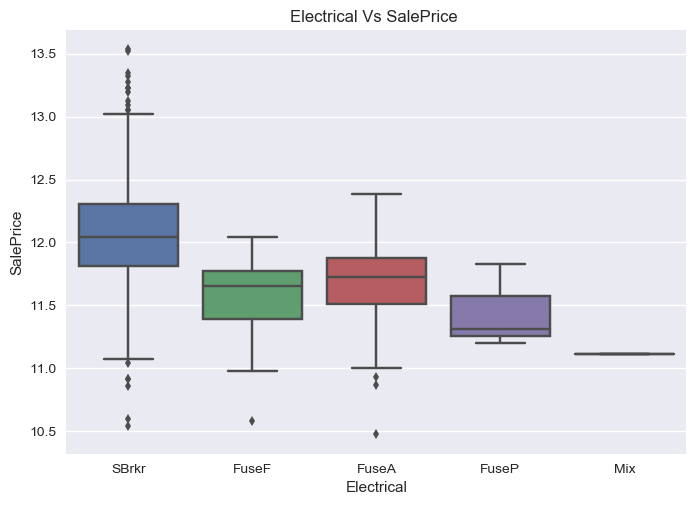

In [71]:
missingValue = combine_df["Electrical"].isnull().sum().sum()
print("Number of missing value:",missingValue)
print(combine_df["Electrical"].value_counts())

sns.boxplot("Electrical","SalePrice",data=train)
plt.title("Electrical Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Electrical");

In [72]:
combine_df['Electrical'] = combine_df['Electrical'].fillna(
                                combine_df['Electrical'].mode()[0])

**Cell Report:** It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.

**KitchenQual:**

Number of missing value: 1
TA    1491
Gd    1150
Ex     202
Fa      70
Name: KitchenQual, dtype: int64


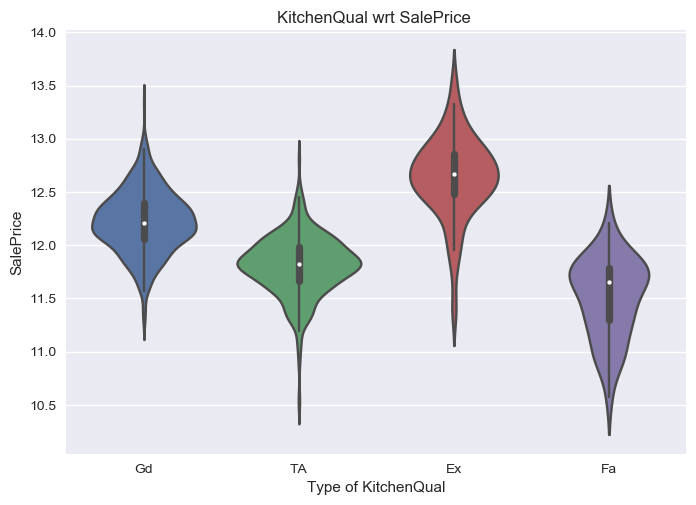

In [73]:
missingValue = combine_df["KitchenQual"].isnull().sum().sum()
print("Number of missing value:",missingValue)
print(combine_df["KitchenQual"].value_counts())

sns.violinplot(train["KitchenQual"],train["SalePrice"])
plt.title("KitchenQual wrt SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Type of KitchenQual");

In [74]:
combine_df['KitchenQual'] = combine_df['KitchenQual'].fillna(
                              combine_df['KitchenQual'].mode()[0])

**Cell Report:** Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.

**Exterior1st and Exterior2nd :** 

Number of missing value: 1
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     408
Plywood     221
CemntBd     125
BrkFace      87
WdShing      56
AsbShng      44
Stucco       42
BrkComm       6
Stone         2
AsphShn       2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64


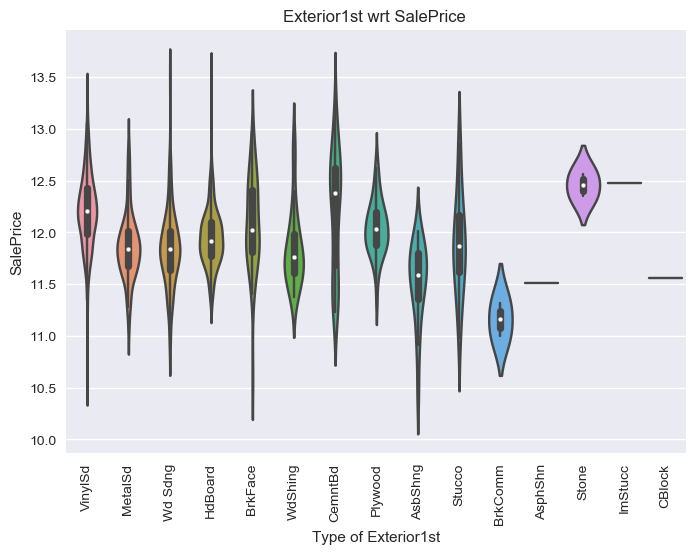

In [75]:
missingValue = combine_df["Exterior1st"].isnull().sum().sum()
print("Number of missing value:",missingValue)
print(combine_df["Exterior1st"].value_counts())

sns.violinplot(train["Exterior1st"],train["SalePrice"])
plt.title("Exterior1st wrt SalePrice ")
plt.xticks(rotation=90)
plt.ylabel("SalePrice")
plt.xlabel("Type of Exterior1st");

In [76]:
combine_df['Exterior1st'] = combine_df['Exterior1st'].fillna(
                               combine_df['Exterior1st'].mode()[0])
combine_df['Exterior2nd'] = combine_df['Exterior2nd'].fillna(
                               combine_df['Exterior2nd'].mode()[0])

**Cell Report:** Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

**SaleType :**

Number of missing value: 1
WD       2522
New       237
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64


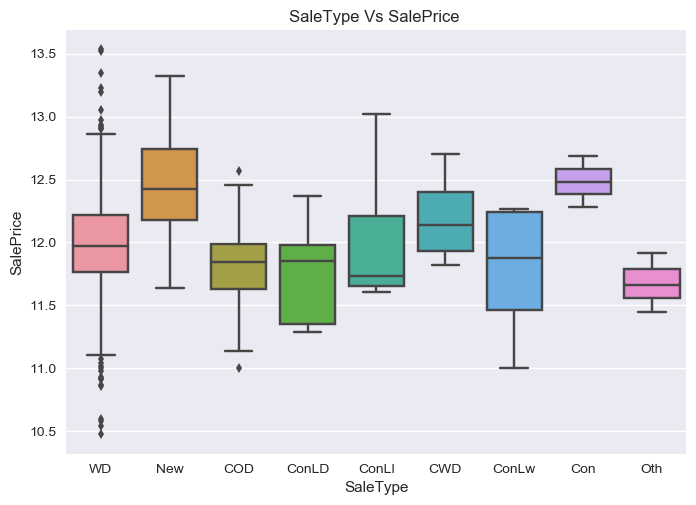

In [77]:
missingValue = combine_df["SaleType"].isnull().sum().sum()
print("Number of missing value:",missingValue)
print(combine_df["SaleType"].value_counts())

sns.boxplot("SaleType","SalePrice",data=train)
plt.title("SaleType Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("SaleType");

In [78]:
combine_df['SaleType'] = combine_df['SaleType'].fillna(
                              combine_df['SaleType'].mode()[0])

**Cell Report:** Fill in again with most frequent which is "WD"

## 8.3 Cheack if there any Missing Values

In [91]:
# Check the Number of missing value
print("Number of missing value:")
print(combine_df.isnull().sum().sum())

Number of missing value:
0


**All missing values are removed Successfully**

# 9 More Features Engineering

## 9.1 Label Encoding with Ranking

There some categorical features which carry ordinal information. So, we need to encoding them with their proper meaningfull order.

In [92]:
combine_df['ExterQual'] = combine_df['ExterQual'].map({'Ex': 5,'Gd': 4, 'TA': 3,
                                                       'Fa': 2, 'Po': 1})
combine_df['ExterCond'] = combine_df['ExterCond'].map({'Ex': 5,'Gd': 4, 'TA': 3,
                                                       'Fa': 2, 'Po': 1})
combine_df['BsmtQual'] = combine_df['BsmtQual'].map({'Ex': 5,'Gd': 4, 'TA': 3,
                                                     'Fa': 2, 'Po': 1,'None':0})
combine_df['BsmtExposure'] = combine_df['BsmtExposure'].map({'Gd': 3, 'Av': 2,
                                                     'Mn': 1, 'No': 0,'None':0})
combine_df['BsmtCond'] = combine_df['BsmtCond'].map({'Ex': 5,'Gd': 4, 'TA': 3,
                                                     'Fa': 2, 'Po': 1,'None':0})
combine_df['BsmtFinType1'] = combine_df['BsmtFinType1'].map({'GLQ': 6,'ALQ': 5, 
                                     'BLQ': 4,'Rec': 3, 'LwQ': 2,'Unf':1,'None':0})
combine_df['BsmtFinType2'] = combine_df['BsmtFinType2'].map({'GLQ': 6,'ALQ': 5,
                                    'BLQ': 4, 'Rec': 3,'LwQ': 2,'Unf':1,'None':0})
combine_df['HeatingQC'] = combine_df['HeatingQC'].map({'Ex': 5,'Gd': 4, 'TA': 3, 
                                                       'Fa': 2, 'Po': 1})
combine_df['CentralAir'] = combine_df['CentralAir'].map({'Y': 1,'N': 0})
combine_df['KitchenQual'] = combine_df['KitchenQual'].map({'Ex': 5,'Gd': 4, 
                                                    'TA': 3, 'Fa': 2, 'Po': 1})
combine_df['FireplaceQu'] = combine_df['FireplaceQu'].map({'Ex': 5,'Gd': 4, 'TA': 3,
                                                        'Fa': 2, 'Po': 1,'None':0})
combine_df['GarageFinish'] = combine_df['GarageFinish'].map({'Fin': 3,
                                                        'RFn': 2, 'Unf': 1,'None':0})
combine_df['GarageQual'] = combine_df['GarageQual'].map({'Ex': 5,'Gd': 4, 'TA': 3,
                                                    'Fa': 2, 'Po': 1,'None':0})
combine_df['GarageCond'] = combine_df['GarageCond'].map({'Ex': 5,'Gd': 4, 'TA': 3,
                                                        'Fa': 2, 'Po': 1,'None':0})
combine_df['PoolQC'] = combine_df['PoolQC'].map({'Ex': 4,'Gd': 3, 'TA': 2, 
                                                 'Fa': 1,'None':0})
combine_df['Fence'] = combine_df['Fence'].map({'GdPrv': 4,'MnPrv': 3, 'GdWo': 2,
                                               'MnWw': 1,'None':0})
combine_df['Functional'] = combine_df['Functional'].map({'Typ':8,'Min1':7,'Min2':6,
                                        'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
combine_df['Electrical'] = combine_df['Electrical'].map({'SBrkr': 5,'FuseA': 4,
                                                'FuseF': 3, 'FuseP': 2, 'Mix': 1})
combine_df['Street'] = combine_df['Street'].map({'Pave': 2,'Grvl': 1})
combine_df['Alley'] = combine_df['Alley'].map({'Pave': 2,'Grvl': 1,'None':0})
combine_df['LotShape'] = combine_df['LotShape'].map({'Reg':4,'IR1': 
                                                     3,'IR2': 2,'IR3':1})
combine_df['LandSlope'] = combine_df['LandSlope'].map({'Gtl':3,'Mod': 2,'Sev': 1})
combine_df['BldgType'] = combine_df['BldgType'].map({'Duplex': 5,'1Fam': 4, 
                                            '2fmCon': 3, 'TwnhsE': 2, 'Twnhs': 1})
combine_df['HouseStyle'] = combine_df['HouseStyle'].map({'SLvl':5,'SFoyer':5,
        '2.5Unf':3.5,'2.5Fin':4,'2Story':3,'1.5Unf':1.5,'1.5Fin':2,'1Story':1})
combine_df['PavedDrive'] = combine_df['PavedDrive'].map({'Y':3,'P': 2,'N': 1})
combine_df['GarageType'] = combine_df['GarageType'].map({'2Types':6,'Attchd':5,
                        'Basment':4,'BuiltIn':3,'CarPort':2,'Detchd':1,'None':0})
combine_df['RoofMatl'] = combine_df['RoofMatl'].map({'ClyTile':8,'CompShg':7,
            'Membran':6, 'Metal':5,'Roll':4,'Tar&Grv':3,'WdShake':2,'WdShngl':1})


## 9.2 Adding more  Features:

Since corelated features are very important to determine house prices, we add one more feature to reduce multicollinearity of the features.

In [93]:
# Adding total sqfootage feature 
combine_df['TotalSF'] = combine_df['TotalBsmtSF'] + combine_df['1stFlrSF'] + 
                          combine_df['2ndFlrSF']

In [94]:
# Adding total sqfootage feature 
combine_df['GrLivAreaTotRmsAbvGrd'] = combine_df['GrLivArea'] +
                                     combine_df['TotRmsAbvGrd']

In [95]:
# Adding total sqfootage feature 
combine_df['GarageAreaGarageCars'] = combine_df['GarageArea'] +
                                      combine_df['GarageCars']

In [96]:
# Adding total sqfootage feature 
combine_df['BedroomAbvGrTotRmsAbvGrd'] = combine_df['BedroomAbvGr'] + 
                                          combine_df['TotRmsAbvGrd']

In [97]:
# Adding total sqfootage feature 
combine_df['TotalMainBath'] =  combine_df['FullBath'] + 
                                       (combine_df['HalfBath']*0.5)

In [98]:
combine_df['TotalBath'] = combine_df['TotalMainBath'] + 
       combine_df['BsmtFullBath'] +(combine_df['BsmtHalfBath'] * 0.5)

In [99]:
# Adding total sqfootage feature 
combine_df['GarageYrBltYearBuilt'] = combine_df['GarageYrBlt'] +
                                     combine_df['YearBuilt']

In [100]:
# Adding total sqfootage feature 
combine_df['GrLivAreaTotRmsAbvGrd'] = combine_df['GrLivArea'] +
                                       combine_df['TotRmsAbvGrd']

In [101]:
# Adding total sqfootage feature 
combine_df['2ndFlrSFHalfBath'] = combine_df['2ndFlrSF'] + 
                                    combine_df['HalfBath']

In [102]:
combine_df['BsmtScore']= combine_df['BsmtQual']  * 
                  combine_df['BsmtCond'] * combine_df['TotalBsmtSF']


In [103]:
combine_df['GarageScore']=(combine_df['GarageArea']) * 
      (combine_df['GarageCars']) * (combine_df['GarageFinish'])*
            (combine_df['GarageQual']) *(combine_df['GarageType'])

In [104]:
combine_df['TotalLivingSF'] = combine_df['GrLivArea'] + 
              combine_df['TotalBsmtSF'] - combine_df['LowQualFinSF']


In [105]:
combine_df['AgeSold'] = combine_df['YrSold'] - combine_df['YearBuilt']

In [106]:
combine_df['TotalArea'] = combine_df['TotalBsmtSF'] + 
        combine_df['1stFlrSF'] + combine_df['2ndFlrSF'] + 
                             combine_df['GarageArea']
                                                                             

In [107]:
combine_df['TotalPorchSF'] = combine_df['OpenPorchSF'] +
           combine_df['3SsnPorch'] + combine_df['EnclosedPorch'] + 
                   combine_df['ScreenPorch'] + combine_df['WoodDeckSF']                                                                           

In [108]:
combine_df['SoldDiff'] = 2010 - combine_df['YrSold']

In [110]:
print("Combine Dataset Size:",combine_df.shape)

Combine Dataset Size: (2914, 93)


**Cell Report:** After adding some new features, combine dataset has 2914 rows and 93 columns.

## 9.3 Skewed Features Analysis
Let's investigate the skewness of the data and try to remove them.

In [111]:
numeric_feats = combine_df.dtypes[combine_df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = combine_df[numeric_feats].apply(lambda x: skew(
                              x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



Skew
MiscVal        21.928383
PoolQC         20.330886
PoolArea       17.679480
LowQualFinSF   12.405546
3SsnPorch      11.366100
KitchenAbvGr    4.297992
BsmtFinSF2      4.142042
Alley           4.134247
EnclosedPorch   3.939190
ScreenPorch     3.930829

**Box Cox Transformation of (highly) skewed features:**

We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x .Note that setting  λ=0  is equivalent to log1p used above for the target variable.

In [112]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(
                                                           skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    combine_df[feat] = boxcox1p(combine_df[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 78 skewed numerical features to Box Cox transform


## 9.4 Getting dummy categorical features:

In [113]:
combine_df = pd.get_dummies(combine_df,drop_first=True)
print(combine_df.shape)

(2914, 192)


In [114]:
combine_df.head()

1stFlrSF   2ndFlrSF  3SsnPorch  Alley  BedroomAbvGr  BldgType  BsmtCond  \
0  11.692623  11.686189        0.0    0.0      1.540963  1.820334  1.540963   
1  12.792276   0.000000        0.0    0.0      1.540963  1.820334  1.540963   
2  11.892039  11.724598        0.0    0.0      1.540963  1.820334  1.540963   
3  12.013683  11.354094        0.0    0.0      1.540963  1.820334  1.820334   
4  12.510588  12.271365        0.0    0.0      1.820334  1.820334  1.540963   

   BsmtExposure  BsmtFinSF1  BsmtFinSF2     ...       SaleCondition_Normal  \
0      0.000000   11.170327         0.0     ...                          1   
1      1.540963   12.062832         0.0     ...                          1   
2      0.730463   10.200343         0.0     ...                          1   
3      0.000000    8.274266         0.0     ...                          0   
4      1.194318   10.971129         0.0     ...                          1   

   SaleCondition_Partial  SaleType_CWD  SaleType_Con  SaleType_ConLD  \
0                      0             0             0               0   
1                      0             0             0               0   
2                      0             0             0               0   
3                      0             0             0               0   
4                      0             0             0               0   

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  
0               0               0             0             0            1  
1               0               0             0             0            1  
2               0               0             0             0            1  
3               0               0             0             0            1  
4               0               0             0             0            1  

[5 rows x 192 columns]

# 10 Standardizing Numeric Data

Its best practice to standardize our inputs by subtracting the mean and dividing by the standard deviation so that they are all scaled similarly. We only want to do this to our numeric features. In pandas these were our original numeric variables. We will apply this standardization to both train and test data at the same time, which is technically data snooping but will proceed again for simplicity.

In [115]:
## Standardizing numeric features
numeric_cols =combine_df.columns[combine_df.dtypes != 'object']
numeric_col_means = combine_df.loc[:, numeric_cols].mean()
numeric_col_std = combine_df.loc[:, numeric_cols].std()
combine_df.loc[:, numeric_cols] = (combine_df.loc[
         :, numeric_cols] - numeric_col_means) / numeric_col_std

**Cheack the data is scaled or not:**

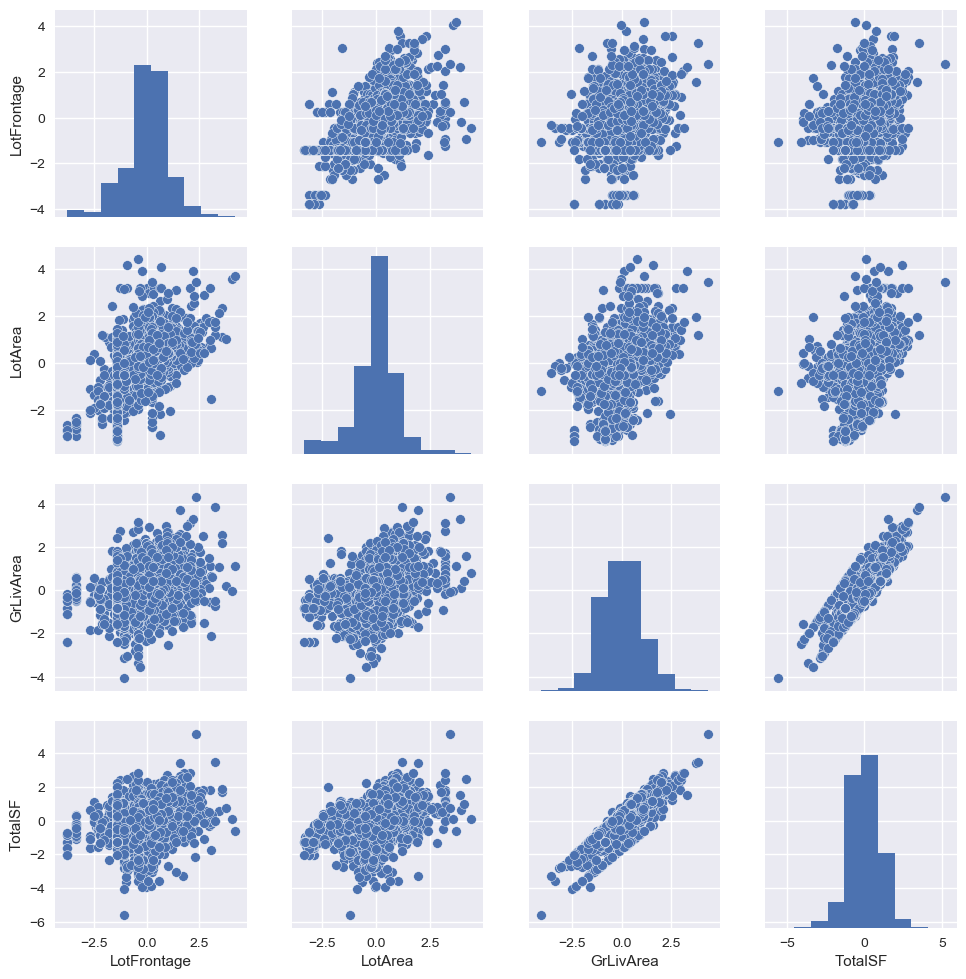

In [116]:
numeric_features = combine_df.loc[:,['LotFrontage', 'LotArea', 
                                     'GrLivArea', 'TotalSF']]
ax = sns.pairplot(numeric_features)

**Cell Report:** Data scaled successfully.

# 11 Spliting dataset into original train and test form

In [118]:
train_df = combine_df[:ntrain]
test_df = combine_df[ntrain:]

In [8]:
print("Shape of Train Dataset:",train_df.shape)
print("Size of target value:", y_train.shape)
print("Shape of Test Dataset:",test_df.shape)

Shape of Train Dataset: (1455, 192)
Size of target value: (1455,)
Shape of Test Dataset: (1459, 192)


# 12 Building  Regressor Models

In [9]:
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import ShuffleSplit

## 12.1 Learning Curve Function

Learning Curve shows the validation and training score of an estimator for varying numbers of training samples. It describes how much we will benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefitted much by adding more training data. 

In [33]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=2, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator,
                                            X, y, cv=cv,n_jobs=n_jobs, 
                                                 train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", 
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", 
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


## 12.2 Validation Curve Function

Validation Curve is used for identification of over-fitting and under-fitting of a model. It Shows the training and validation scores for varying model parameter values. If both the training score and the validation score are low for specific parameter is called **underfitting**. If both the training score and the validation score are good for specific parameter is called model is performing fairly **perfect**. If the training score is good but the validation score is very poor for specific parameter is called **overfitting**.

In [34]:
def plot_validation_curve(estimator,X, y,title,param_name, param_range,n_jobs=2):
    
    #param_range = np.logspace(-5, 2, 10)

    train_scores, valid_scores = validation_curve(estimator,
                                    X, y,param_name, param_range,cv=10,
                                                  scoring="r2", n_jobs=n_jobs)


    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(valid_scores, axis=1)
    test_std = np.std(valid_scores, axis=1)

    plt.figure(figsize=(8,6))
    plt.plot(param_range, train_mean,color='blue', marker='o',
                     markersize=5, label='training accuracy')
    plt.fill_between(param_range, train_mean + train_std,train_mean - train_std,
                     alpha=0.15,color='blue')
    plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s',
             markersize=5,label='validation accuracy')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std,
                     alpha=0.15,color='green')
    
    plt.title(title)
    plt.grid()
    plt.xscale('log')
    plt.legend(loc='lower right')
    plt.xlabel(param_name)
    plt.ylabel('R2 Score')
    #plt.ylim([0.8, 1.0])
    plt.show()


**Splitting the Train dataset into train and validation set:**

In [26]:
Xtrain,Xtest,ytrain,ytest=train_test_split(train_df,y_train,test_size=0.3)

**Cell Report:** Train dataset is splitted into train and validation set where train preserve 70% and validation preserve 30% data.

## 12.3 Ridge Regressor

In [130]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [134]:
ridge.fit(Xtrain,ytrain)
ridge_pred = ridge.predict(Xtest)
rmse = np.sqrt(mean_squared_error(ytest, ridge_pred))
print("Ridge Predicted Root Mean Squred Error:%0.5f" % rmse)

Ridge Predicted Root Mean Squred Error:0.11664


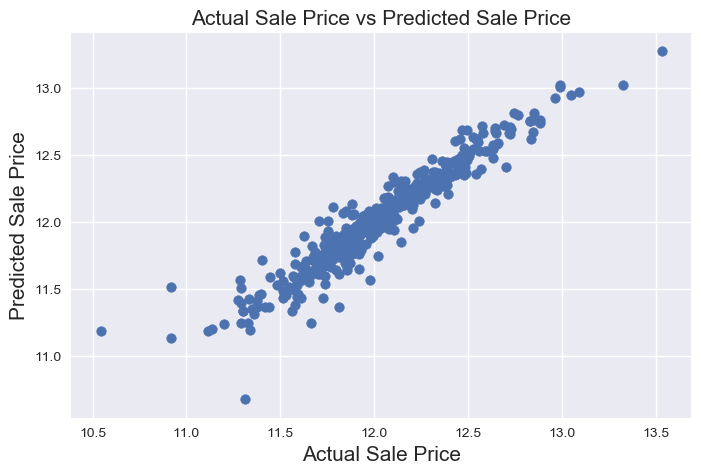

In [140]:
plt.figure(figsize=(8,5))
plt.scatter(ytest, ridge_pred)
plt.title("Actual Sale Price vs Predicted Sale Price",fontsize=15)
plt.xlabel("Actual Sale Price",fontsize=15)
plt.ylabel("Predicted Sale Price",fontsize=15);

**Cross Validation:**

In [135]:
scores = cross_val_score(ridge, train_df, y_train, cv=5,
                         scoring="mean_squared_error")
print("Cross Validation Root Mean Squred Error: %0.5f (+/- %0.3f)" % (
            np.sqrt(-scores.mean()), scores.std() * 2))

Cross Validation Root Mean Squred Error: 0.12096 (+/- 0.003)


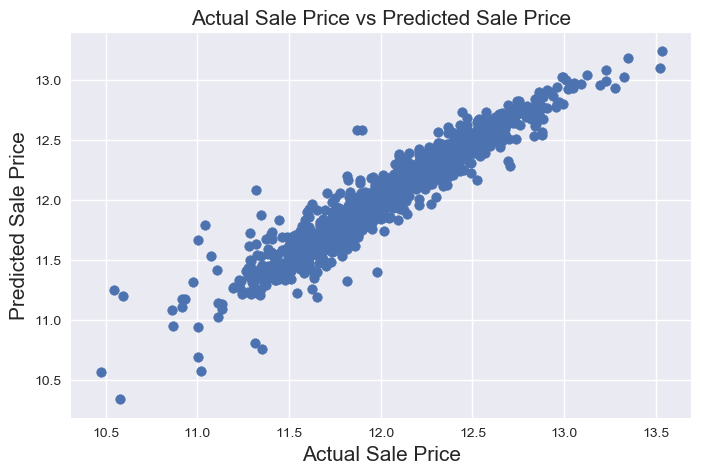

In [141]:
predictions = cross_val_predict(ridge, train_df, y_train, cv=5)
plt.figure(figsize=(8,5))
plt.scatter(y_train, predictions)
plt.title("Actual Sale Price vs Predicted Sale Price",fontsize=15)
plt.xlabel("Actual Sale Price",fontsize=15)
plt.ylabel("Predicted Sale Price",fontsize=15);

**Learning Curve:**

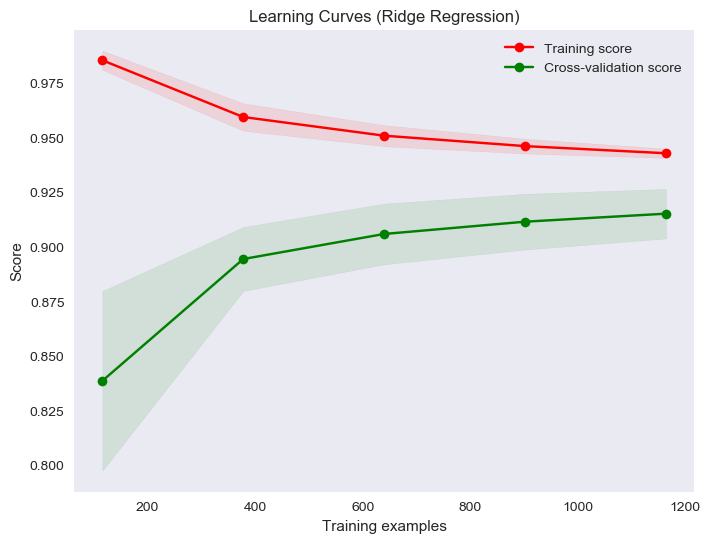

In [129]:
title = "Learning Curves (Ridge Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(ridge, title, train_df, y_train, cv=cv, n_jobs=-1)
plt.show()

**Cell Report:**


* The Learning curve of ridge regression shows that cross validation Score(green line) increases with increase in training points. It reaches a pretty high score of 0.91 approximately and so we can see the model generalizes well. The Training Score(red line) decreases slightly and reaches approximately 0.94.Generally,we see it fits the model well and the cross validation score reaches a pretty high score. The cross validation score has two significant phases where the rates of change are different. One is the high positive rate of change which goes on uptil approximately 400 training points. The other is after 400 where the rate of increase is much lower. The positive rate of change which goes on uptil approximately 1200 training points, So adding more training points will definitely improve the score but beyond that adding more training points will not be very useful as the rate plateaus.

**Validation Curve:**

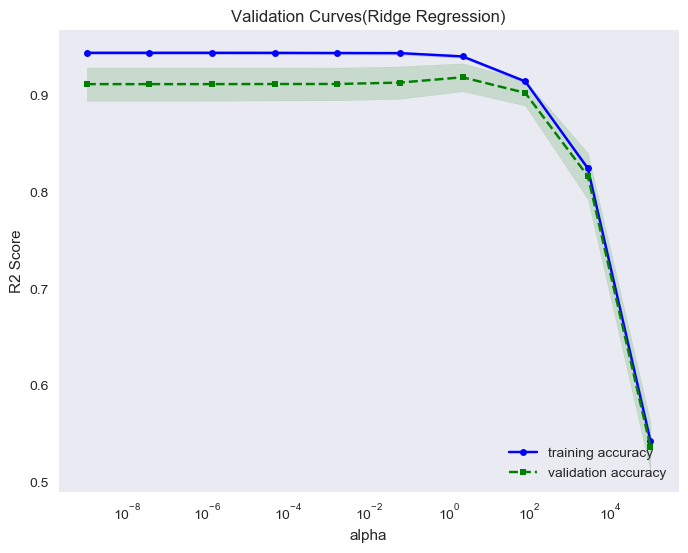

In [226]:
title="Validation Curves(Ridge Regression)"
plot_validation_curve(ridge,train_df, y_train,title,
                      param_name='alpha',param_range=np.logspace(-9, 5, 10))

**Cell Report:** Above Validation curve shows that model is perfect untill alpha=1. After this alpha value training score and validation score are falling down and model is going to under fitting.

**GrideSearchCV:**

In [142]:
param_grid = [{'alpha':[10,5,4,3,2,1,0,0.1,0.01,0.001]}]
grid_ridge = GridSearchCV(ridge, param_grid,
                        n_jobs=-1, cv=5,verbose=1,scoring="mean_squared_error")
grid_ridge.fit(train_df, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   17.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'alpha': [10, 5, 4, 3, 2, 1, 0, 0.1, 0.01, 0.001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='mean_squared_error', verbose=1)

In [143]:
print('Best RMSE :%0.5f'% np.sqrt((-grid_ridge.best_score_)))
print("Best Perameter:",grid_ridge.best_params_)

Best RMSE :0.11905
Best Perameter: {'alpha': 10}


## 12.4 Lasso Regressor

In [10]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001)

In [13]:
lasso.fit(Xtrain,ytrain)
lasso_pred = lasso.predict(Xtest)
rmse = np.sqrt(mean_squared_error(ytest, lasso_pred))
print("Lasso Predicted Root Mean Squred Error:%0.5f" % rmse)

Lasso Predicted Root Mean Squred Error:0.11127


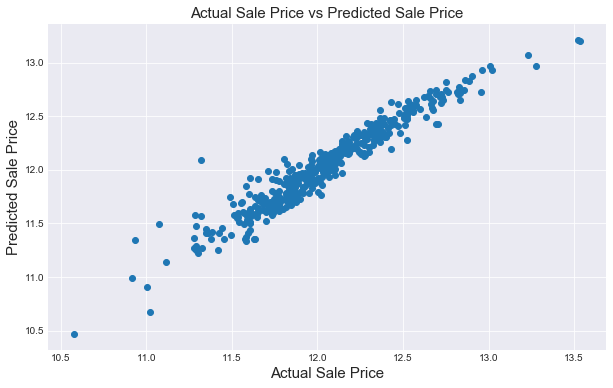

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(ytest, lasso_pred)
plt.title("Actual Sale Price vs Predicted Sale Price",fontsize=15)
plt.xlabel("Actual Sale Price",fontsize=15)
plt.ylabel("Predicted Sale Price",fontsize=15);

**Cross Validation:**

In [149]:
scores = cross_val_score(lasso, train_df, y_train, cv=5, 
                         scoring='mean_squared_error')
print("Cross Validation Root Mean Squred Error: %0.5f (+/- %0.3f)" % (
                             np.sqrt(-scores.mean()), scores.std() * 2))

Cross Validation Root Mean Squred Error: 0.11540 (+/- 0.002)


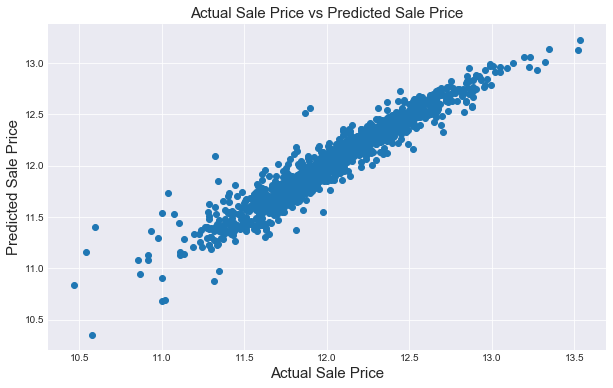

In [11]:
predictions = cross_val_predict(lasso, train_df, y_train, cv=5)
plt.figure(figsize=(10,6))
plt.scatter(y_train, predictions)
plt.title("Actual Sale Price vs Predicted Sale Price",fontsize=15)
plt.xlabel("Actual Sale Price",fontsize=15)
plt.ylabel("Predicted Sale Price",fontsize=15);

**Learning Curve:**

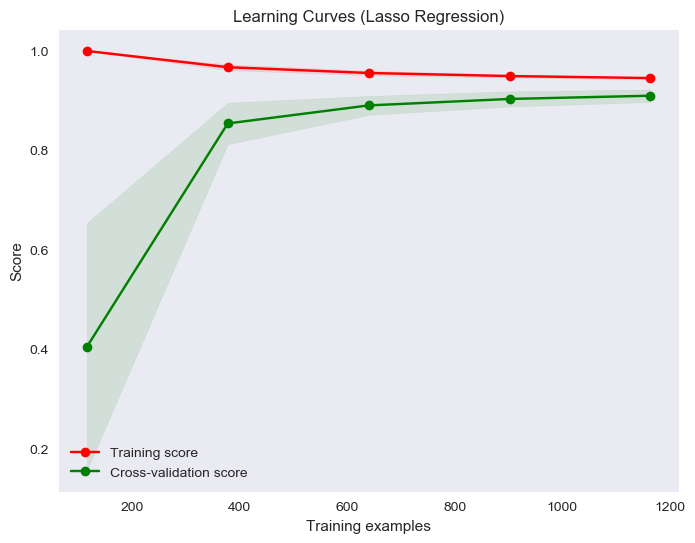

In [220]:
title = "Learning Curves (Lasso Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(Lasso(alpha=0.00001), title, train_df,
                    y_train, cv=cv, n_jobs=-1)
plt.show()

**Cell Report:**


* The Learning curve of Lasso regression shows that cross validation Score(green line) increases with increase in training points. It reaches a pretty high score of 0.9 and so we can see the model generalizes well. The Training Score(red line) decreases slightly and reaches 0.95 and stays constant. So we see it fits the model well and reaches a pretty high score. The testing score has two significant phases where the rates of change are different. One is the positive rate of change which goes on uptil approximately 900 training points (within this positive rate of change, we again observe two different rates. One is uptil 350 training points where the rate of increase is very high.The other is between 350 - 900 where the rate of increase is much lower.) and the other is the region where it plateaus with no/very little rate of change which is beyond 900 training points. So if we are below 900 training points, adding more training points will definitely improve the score but beyond that adding more training points will not be very useful as the rate plateaus.

**Validation Curve:**

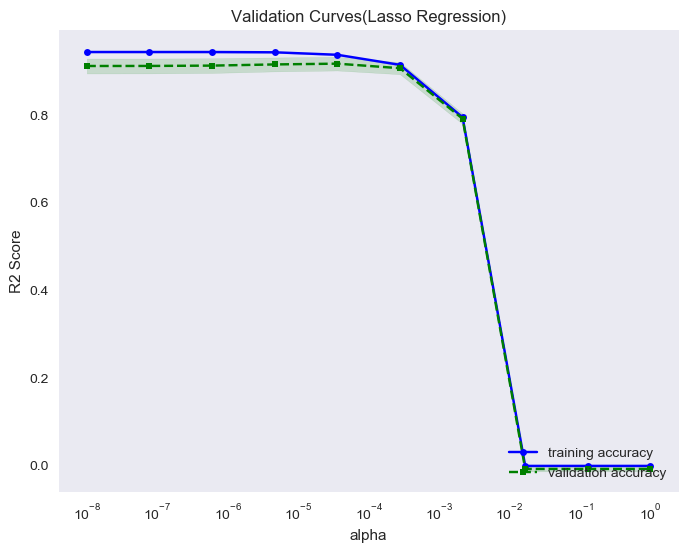

In [228]:
title="Validation Curves(Lasso Regression)"
plot_validation_curve(Lasso(alpha=0.00001),
                      train_df, y_train,title,param_name='alpha',
                      param_range=np.logspace(-8, 0, 10))

**Cell Report:** The Validation Curve Showes that model performs well untill alpha= 0.0001. After this alpha value model is going to underfit.

**GrideSearchCV:**

In [15]:
param_grid = [{'alpha':[0.002,0.001,0.001,0.0001,0.00001,0.000001]}]
grid_lasso = GridSearchCV(lasso, param_grid,
                          n_jobs=-1, cv=5,verbose=1,
                          scoring="mean_squared_error")
grid_lasso.fit(train_df, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   15.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'alpha': [0.002, 0.001, 0.001, 0.0001, 1e-05, 1e-06]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='mean_squared_error', verbose=1)

In [16]:
print('Best Score RMSE: %0.4f'% np.sqrt((-grid_lasso.best_score_)))
print("Best Perameter:",grid_lasso.best_params_)

Best Score RMSE: 0.1141
Best Perameter: {'alpha': 0.002}


## 12.5 Elastic Net Regressor

In [17]:
from sklearn.linear_model import ElasticNet
elsnet = ElasticNet(alpha=0.002)

In [18]:
elsnet.fit(Xtrain,ytrain)
elsnet_pred = elsnet.predict(Xtest)
rmse = np.sqrt(mean_squared_error(ytest, elsnet_pred))
print("ElasticNet Predicted Root Mean Squred Error:%0.5f" % rmse)

ElasticNet Predicted Root Mean Squred Error:0.11125


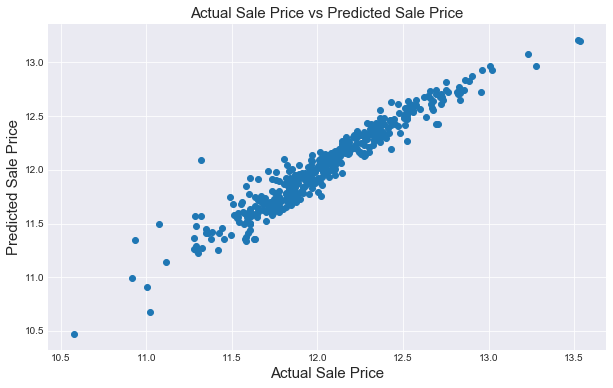

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(ytest, elsnet_pred)
plt.title("Actual Sale Price vs Predicted Sale Price",fontsize=15)
plt.xlabel("Actual Sale Price",fontsize=15)
plt.ylabel("Predicted Sale Price",fontsize=15);

In [22]:
scores = cross_val_score(elsnet, train_df, y_train, cv=5,
                         scoring='mean_squared_error')
print("Cross Validation Root Mean Squred Error: %0.5f (+/- %0.3f)" % (
             np.sqrt(-scores.mean()), scores.std() * 2))

Cross Validation Root Mean Squred Error: 0.11540 (+/- 0.002)


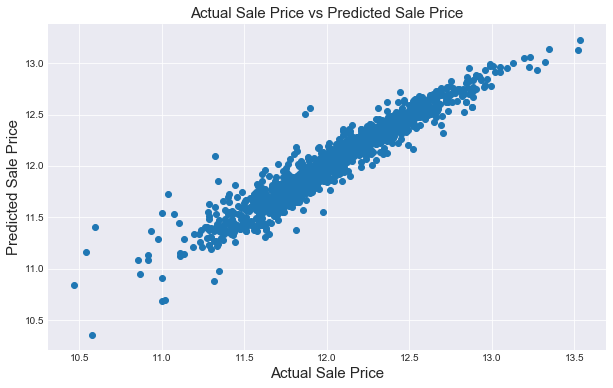

In [24]:
predictions = cross_val_predict(elsnet, train_df, y_train, cv=5)
plt.figure(figsize=(10,6))
plt.scatter(y_train, predictions)
plt.title("Actual Sale Price vs Predicted Sale Price",fontsize=15)
plt.xlabel("Actual Sale Price",fontsize=15)
plt.ylabel("Predicted Sale Price",fontsize=15);

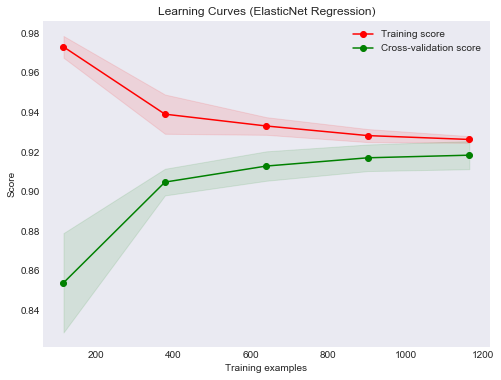

In [160]:
title = "Learning Curves (ElasticNet Regression)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(elsnet, title, train_df, y_train, cv=cv, n_jobs=-1)
plt.show()

**Cell Report:**


* ElasticNet Learning curve shows that cross validation Score(green line) increases with increase in training points. It reaches a pretty high score of 0.91 approximately and so we can see the model generalizes well. But, The Training Score(red line) decreases slightly and reaches approximately 0.93 and almost stays constant. So we see it fits the model well and the cross validation score reaches a pretty high score. The cross validation score has two significant phases where the rates of change are different. One is the high positive rate of change which goes on uptil approximately 400 training points. The other is after 400 where the rate of increase is much lower and after some points it is almost saturated. So by adding more training points will not be benifitted the score.

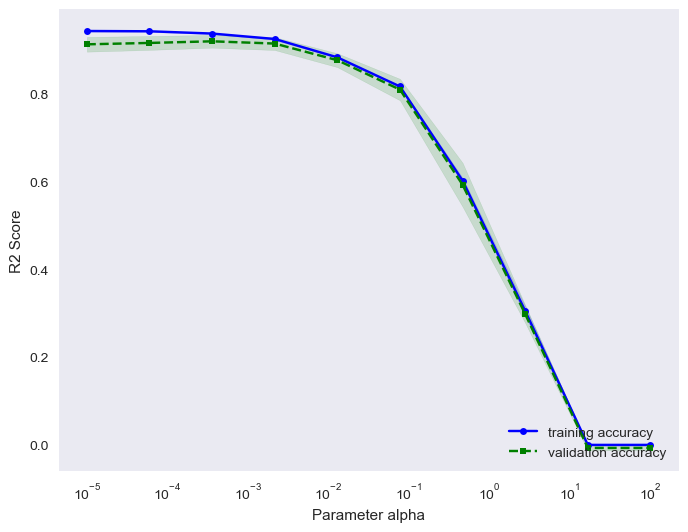

In [161]:
title="Validation Curve(ElasticNet Regression)"
plot_validation_curve(elsnet,
                      train_df, y_train,title,
                      param_name='alpha',param_range=np.logspace(-5, 2, 10))

**Cell Report:** The Validation curve of ElasticNet shows that model performs well untill alpha = 0.0001, and going to be underfitted after this value.

**GridSearchCV:**

In [25]:
param_grid = [{'alpha':[1.0,0.0,0.001,0.01,0.2,0.02,0.002,0.3,0.03,0.002]}]
grid_elsnet = GridSearchCV(elsnet, 
                           param_grid,n_jobs=-1, cv=5,
                           verbose=1,scoring="mean_squared_error")
grid_elsnet.fit(train_df, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   15.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=0.002, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'alpha': [1.0, 0.0, 0.001, 0.01, 0.2, 0.02, 0.002, 0.3, 0.03, 0.002]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='mean_squared_error', verbose=1)

In [26]:
print('Best Score RMSE :%0.5f'%  np.sqrt((-grid_elsnet.best_score_)))
print("Best Perameter:",grid_elsnet.best_params_)

Best Score RMSE :0.11432
Best Perameter: {'alpha': 0.01}


## 12.6 RandomForest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor
randomforest = RandomForestRegressor(n_estimators=500)

In [28]:
randomforest.fit(Xtrain,ytrain)
randomforest_pred = randomforest.predict(Xtest)
rmse = np.sqrt(mean_squared_error(ytest, randomforest_pred))
print("Random Forest Predicted Root Mean Squred Error:%0.5f" % rmse)

Random Forest Predicted Root Mean Squred Error:0.13022


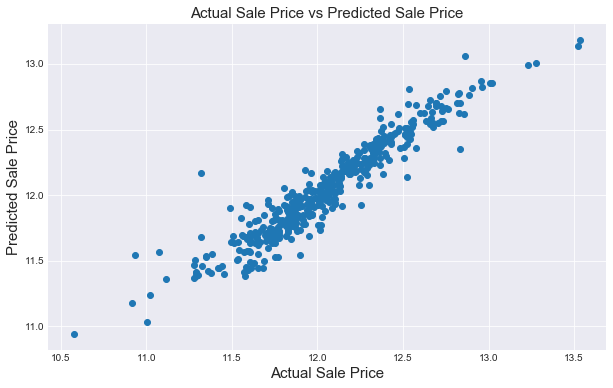

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(ytest, randomforest_pred)
plt.title("Actual Sale Price vs Predicted Sale Price",fontsize=15)
plt.xlabel("Actual Sale Price",fontsize=15)
plt.ylabel("Predicted Sale Price",fontsize=15);

**Cross Validation:**

In [30]:
scores = cross_val_score(randomforest, train_df, y_train,
                         cv=5,scoring="mean_squared_error")
print("Cross Validation Rooot Mean Squred Error: %0.5f (+/- %0.3f)" % (
         np.sqrt(-scores.mean()), scores.std() * 2))

Cross Validation Rooot Mean Squred Error: 0.13116 (+/- 0.002)


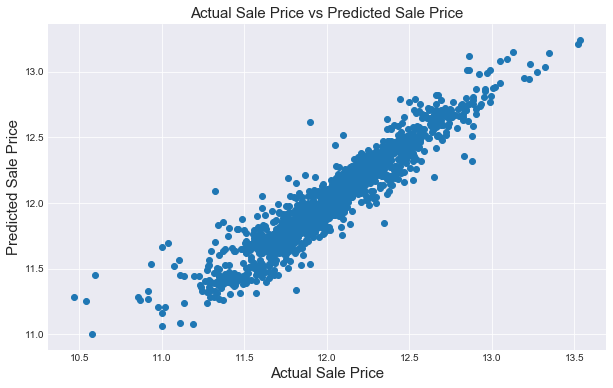

In [31]:
predictions = cross_val_predict(randomforest, train_df, y_train, cv=5)
plt.figure(figsize=(10,6))
plt.scatter(y_train, predictions)
plt.title("Actual Sale Price vs Predicted Sale Price",fontsize=15)
plt.xlabel("Actual Sale Price",fontsize=15)
plt.ylabel("Predicted Sale Price",fontsize=15);

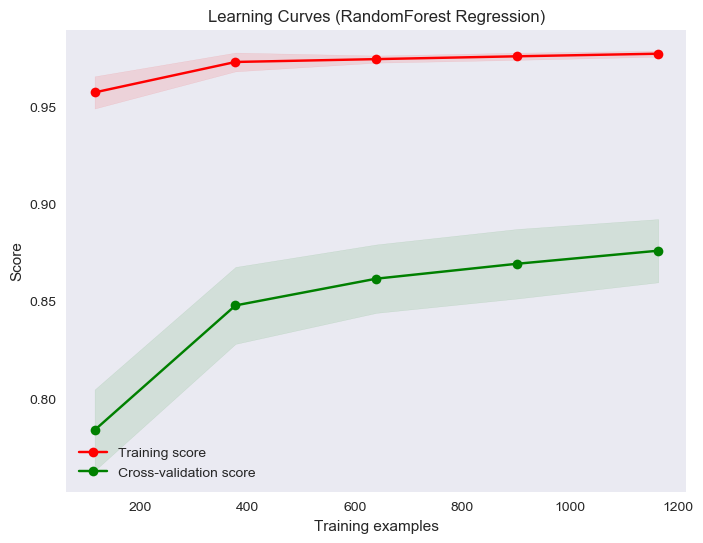

In [237]:
title = "Learning Curves (RandomForest Regression)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(randomforest, title, train_df, y_train, cv=cv, n_jobs=-1)
plt.show()

**Cell Report:**


* The learning curve of Random Forest showes that Cross Validation Score(green line) increases with increase in training points and reaches 0.87. The Training Score(red line) is almost constant showing accuracy of 98% approximatly which tells us it is definitely overfitting the data. This is also a very High Variance problem. Once again the curve show exactly the behaviour where adding more training points will increase the score but not beyond that.

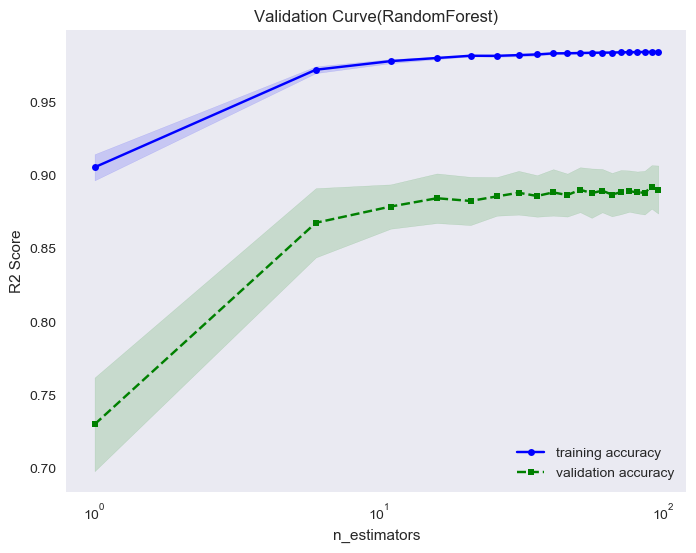

In [234]:
title="Validation Curve(RandomForest)"
plot_validation_curve(randomforest,train_df, y_train,title,
                param_name='n_estimators',param_range=np.arange(1,100, 5))

**Cell Report:** Random Forest validation curve shows that model is underfitting untill 10 estimators and score is very low. By increasing number of estimators to 100, model is going to be stable.

**GrideSearchCV:**

In [32]:
param_grid = { 
    'n_estimators': [100,200,250,300,350,400],
    'max_depth' : [4,5,6,7,8,10,15],
}
grid_random = GridSearchCV(randomforest, param_grid,n_jobs=-1,
                           cv=5,verbose=1,scoring="mean_squared_error")
grid_random.fit(train_df, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:  5.7min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 250, 300, 350, 400], 'max_depth': [4, 5, 6, 7, 8, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='mean_squared_error', verbose=1)

In [33]:
print('Best Score RMSE :%0.5f'%np.sqrt((-grid_random.best_score_)))
print("Best Perameter:",grid_random.best_params_)

Best Score RMSE :0.13072
Best Perameter: {'n_estimators': 200, 'max_depth': 15}


## 12.7 AdaBoost with Random Forest

In [34]:
from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor(RandomForestRegressor())

In [35]:
adaboost.fit(Xtrain,ytrain)
adaboost_pred = adaboost.predict(Xtest)
rmse = np.sqrt(mean_squared_error(ytest, adaboost_pred))
print("Ada Boost Predicted Root Mean Squred Error:%0.5f" % rmse)

Ada Boost Predicted Root Mean Squred Error:0.12648


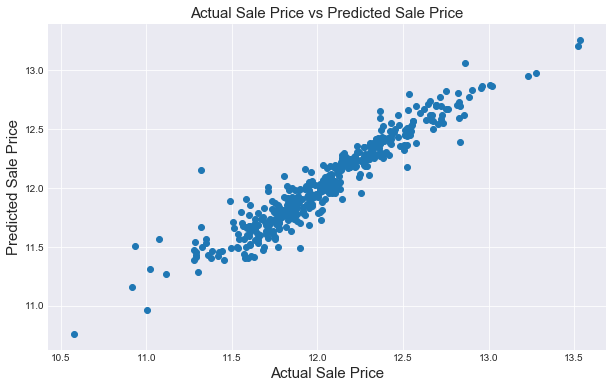

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(ytest, adaboost_pred)
plt.title("Actual Sale Price vs Predicted Sale Price",fontsize=15)
plt.xlabel("Actual Sale Price",fontsize=15)
plt.ylabel("Predicted Sale Price",fontsize=15);

**Cross validation:**

In [36]:
scores = cross_val_score(adaboost, train_df, y_train, cv=5,
                         scoring="mean_squared_error")
print("Cross Validation Root Mean Squred Error: %0.5f (+/- %0.3f)" % (
            np.sqrt(-scores.mean()), scores.std() * 2))

Cross Validation Root Mean Squred Error: 0.12674 (+/- 0.003)


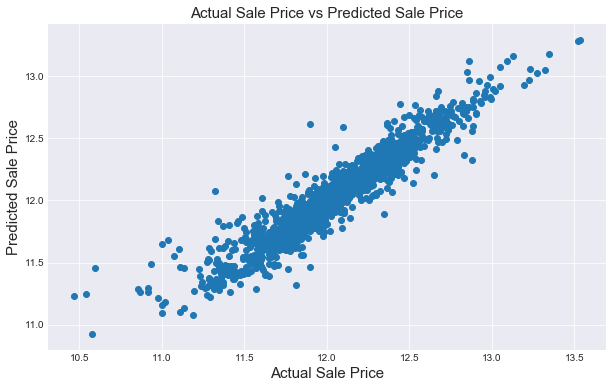

In [40]:
predictions = cross_val_predict(adaboost, train_df, y_train, cv=5)
plt.figure(figsize=(10,6))
plt.scatter(y_train, predictions)
plt.title("Actual Sale Price vs Predicted Sale Price",fontsize=15)
plt.xlabel("Actual Sale Price",fontsize=15)
plt.ylabel("Predicted Sale Price",fontsize=15);

**Learning Curve:**

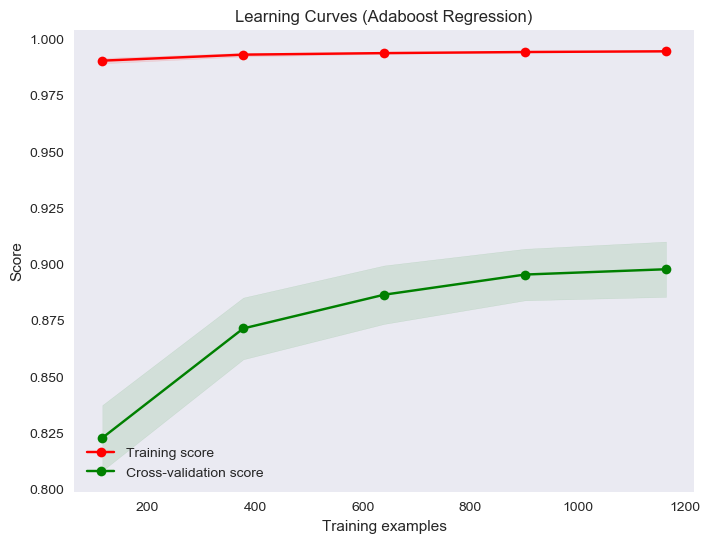

In [241]:
title = "Learning Curves (Adaboost Regression)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(adaboost, title, train_df, y_train, cv=cv, n_jobs=2)
plt.show()

**Cell Report:**


* The learning curve of Random Forest showes that Cross Validation Score(green line) increases with increase in training points and reaches 90%. The Training Score(red line) is almost constant showing accuracy of 99% which tells us it is definitely overfitting the data. This is also a very High Variance problem. Once again the curve show exactly the same behaviour where adding more training points will increase the score but not beyond that.

**Validation Curve:**

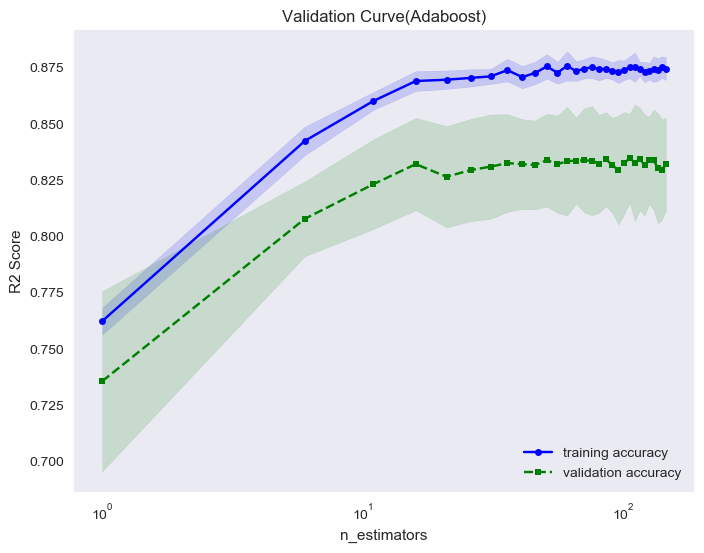

In [248]:
title="Validation Curve(Adaboost)"
plot_validation_curve(AdaBoostRegressor(),
                      train_df, y_train,title,param_name='n_estimators',
                      param_range=np.arange(1,150, 5))

**Cell Report:** Adaboost validation curve shows that model is under fit untill number of 10 estimators. Model is perfect upto 100 estimators. After 100 estimators model is going to underfit.

In [44]:
param_grid = { 
    'n_estimators': [100,150,200,250],
    'learning_rate': [3,2,1,0.1, 0.01,0.001,0.02,0.002,0.0001]
}
grid_adaboost = GridSearchCV(AdaBoostRegressor(), param_grid,
                             n_jobs=-1, cv=5,verbose=1,
                             scoring="mean_squared_error")
grid_adaboost.fit(train_df, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200, 250], 'learning_rate': [3, 2, 1, 0.1, 0.01, 0.001, 0.02, 0.002, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='mean_squared_error', verbose=1)

In [45]:
print('Best Score RMSE:%0.5f'%(np.sqrt(-grid_adaboost.best_score_)))
print("Best Perameter:",grid_adaboost.best_params_)

Best Score RMSE:0.15337
Best Perameter: {'n_estimators': 200, 'learning_rate': 3}


## 12.8 Gradient Boosting Regressor

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
gradboost = GradientBoostingRegressor(n_estimators=500)

In [47]:
gradboost.fit(Xtrain,ytrain)
gradboost_pred = gradboost.predict(Xtest)
rmse = np.sqrt(mean_squared_error(ytest, gradboost_pred))
print("Gradient Boosting Predicted Root Mean Squred Error:%0.5f" % rmse)

Gradient Boosting Predicted Root Mean Squred Error:0.11909


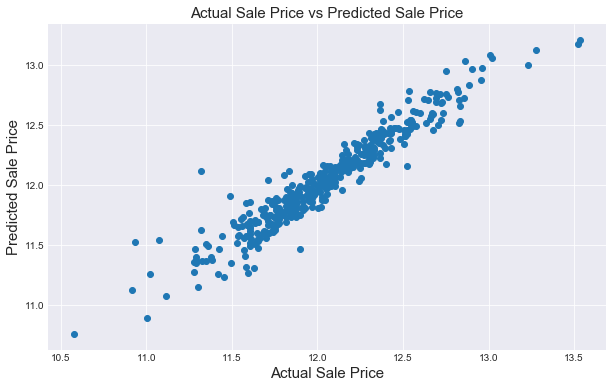

In [48]:
plt.figure(figsize=(10,6))
plt.scatter(ytest, gradboost_pred)
plt.title("Actual Sale Price vs Predicted Sale Price",fontsize=15)
plt.xlabel("Actual Sale Price",fontsize=15)
plt.ylabel("Predicted Sale Price",fontsize=15);

**Cross Validation:**

In [49]:
scores = cross_val_score(gradboost, 
                         train_df, y_train, cv=5,
                         scoring="mean_squared_error")
print("Cross Validation Root Mean Squred Error: %0.5f (+/- %0.3f)" % (
    np.sqrt(-scores.mean()), scores.std() * 2))

Cross Validation Root Mean Squred Error: 0.12066 (+/- 0.002)


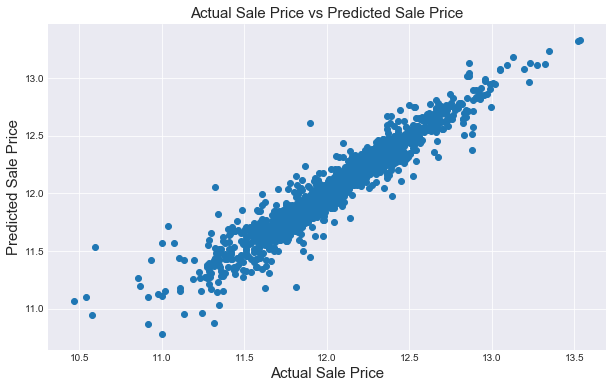

In [50]:
predictions = cross_val_predict(gradboost, train_df, y_train, cv=5)
plt.figure(figsize=(10,6))
plt.scatter(y_train, predictions)
plt.title("Actual Sale Price vs Predicted Sale Price",fontsize=15)
plt.xlabel("Actual Sale Price",fontsize=15)
plt.ylabel("Predicted Sale Price",fontsize=15);

**Learning Curve:**

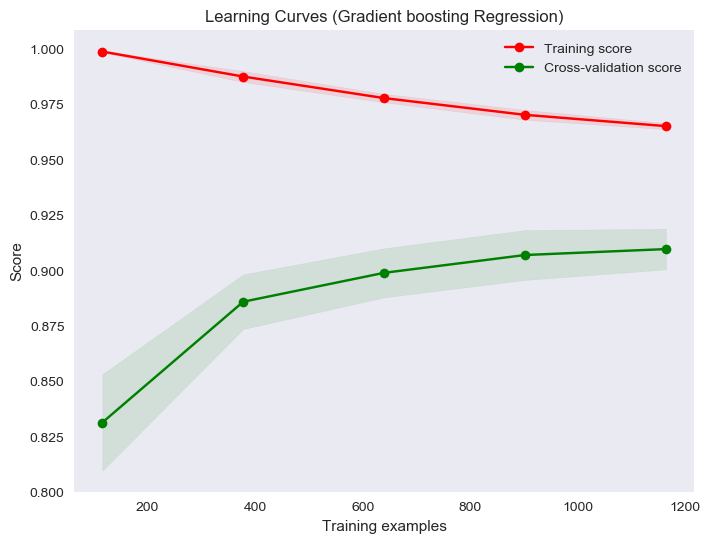

In [268]:
title = "Learning Curves (Gradient boosting Regression)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(gradboost, title, train_df, y_train, cv=cv, n_jobs=2)
plt.show()

**Cell Report:**


* The Learning curve of gradient boosting regression shows that cross validation Score(green line) increases with increase in training points. It reaches a pretty high score of 0.91 approximately. The Training Score(red line) decreases slightly and reaches approximately 0.96.Generally,we see it fits the model well and the cross validation score reaches a pretty high score. The cross validation score has two significant phases where the rates of change are different. One is the high positive rate of change which goes on uptil approximately 400 training points. The other is after 400 where the rate of increase is much lower. The positive rate of change which goes on uptil approximately 1200 training points. This model is suffering High varience problem. So adding more training points will definitely improve the score but beyond that adding more training points will not be very useful as the rate plateaus.

**Validation Curve:**

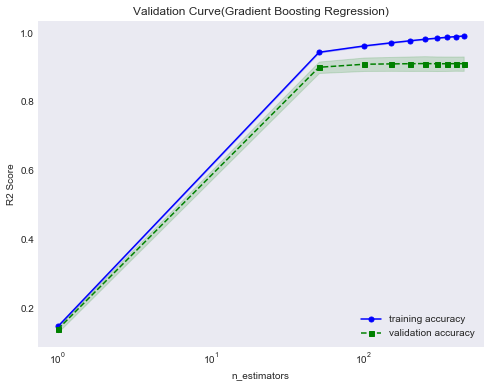

In [65]:
title="Validation Curve(Gradient Boosting Regression)"
plot_validation_curve(GradientBoostingRegressor(),
                      train_df, y_train,title,param_name='n_estimators',
                      param_range=np.arange(1,500, 50))

**Cell Report:** The validation curve shows that model is underfitt and low accurecy untill 50 estemators. Model is going to overfitting after 300 estimators.

**GridSearceCV:**

In [51]:
param_grid = { 
    'n_estimators': [100,150,200,250,300],
    'learning_rate':[1,0.1,0.01,0.001,0.02,0.002,0.2,0.05]
}
gradboost = GridSearchCV(GradientBoostingRegressor(), 
                         param_grid,n_jobs=-1, cv=5,verbose=1,
                         scoring="mean_squared_error")
gradboost.fit(train_df, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200, 250, 300], 'learning_rate': [1, 0.1, 0.01, 0.001, 0.02, 0.002, 0.2, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='mean_squared_error', verbose=1)

In [52]:
print('Best Score RMSE :%0.5f'% np.sqrt((-gradboost.best_score_)))
print("Best Perameter:",gradboost.best_params_)

Best Score RMSE :0.11901
Best Perameter: {'n_estimators': 300, 'learning_rate': 0.05}


## 12.9 Bagging Regressor

In [53]:
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor
from sklearn.linear_model import Ridge

In [54]:
bag = BaggingRegressor(Ridge(),n_estimators=200)

In [55]:
bag.fit(Xtrain,ytrain)
bag_pred = bag.predict(Xtest)
rmse = np.sqrt(mean_squared_error(ytest, bag_pred))
print("Bagging Predicted Root Mean Squred Error:%0.5f" % rmse)

Bagging Predicted Root Mean Squred Error:0.11112


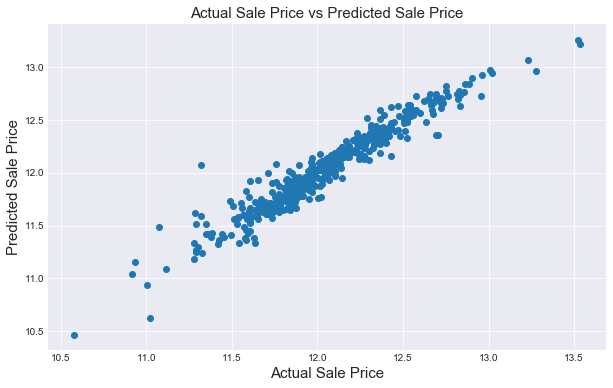

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(ytest, bag_pred)
plt.title("Actual Sale Price vs Predicted Sale Price",fontsize=15)
plt.xlabel("Actual Sale Price",fontsize=15)
plt.ylabel("Predicted Sale Price",fontsize=15);

**Cross Validation:**

In [59]:
scores = cross_val_score(bag, train_df, y_train, 
                         cv=5,scoring="mean_squared_error")
print("Cross Validation Root Mean Squred Error: %0.5f (+/- %0.3f)" % (
         np.sqrt(-scores.mean()), scores.std() * 2))

Cross Validation Root Mean Squred Error: 0.11872 (+/- 0.003)


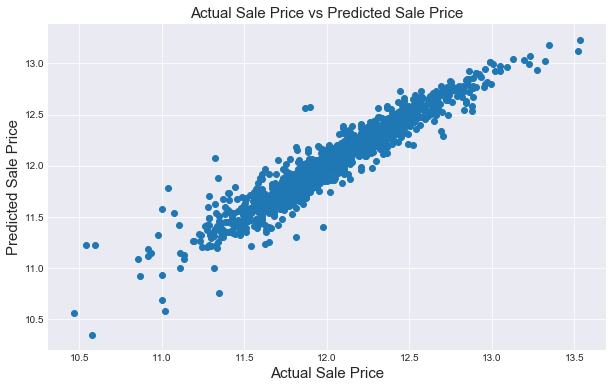

In [60]:
predictions = cross_val_predict(bag, train_df, y_train, cv=5)
plt.figure(figsize=(10,6))
plt.scatter(y_train, predictions)
plt.title("Actual Sale Price vs Predicted Sale Price",fontsize=15)
plt.xlabel("Actual Sale Price",fontsize=15)
plt.ylabel("Predicted Sale Price",fontsize=15);

**Learning Curve:**

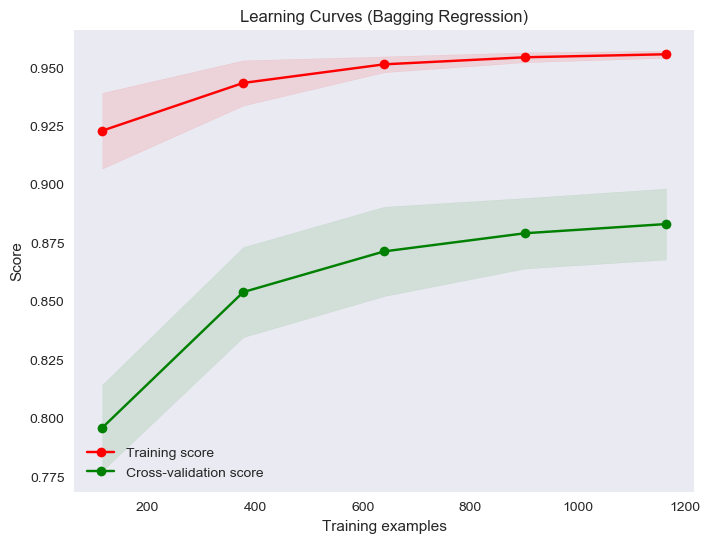

In [293]:
title = "Learning Curves (Bagging Regression)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(bag, title, train_df, y_train, cv=cv, n_jobs=2)
plt.show()

**Cell Report:**


* The learning curve of Bagging showes that Cross Validation Score(green line) increases with increase in training points and reaches 0.88. The Training Score(red line) is almost constant showing accuracy of 96% approximatly which tells us it is definitely overfitting the data. This is also a very High Variance problem. Once again the curve show exactly the behaviour where adding more training points will increase the score but not beyond that.

**Validation Curve:**

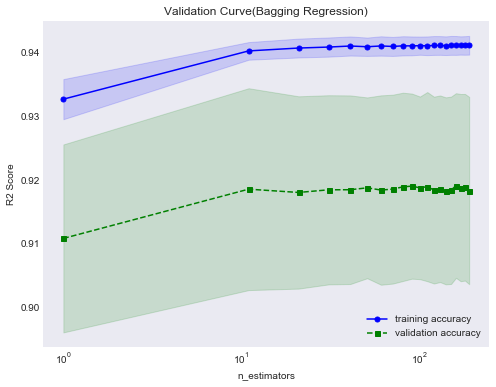

In [64]:
title="Validation Curve(Bagging Regression)"
plot_validation_curve(BaggingRegressor(Ridge()),
                      train_df, y_train,title,param_name='n_estimators',
                      param_range=np.arange(1,200, 10))

**Cell Report:** The Validation Curve shows that model is underfitt and low score untill 10 estimators and trying to stable upto 200 estimators.

**GridSearchCV:**

In [61]:
param_grid = { 
    'n_estimators':[50,100,150,200,250,300]
}
bag_grid = GridSearchCV(BaggingRegressor(Ridge()), 
                        param_grid,n_jobs=-1, cv=5,verbose=1,
                        scoring="mean_squared_error")
bag_grid.fit(train_df, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   42.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=BaggingRegressor(base_estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 150, 200, 250, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='mean_squared_error', verbose=1)

In [62]:
print('Best Score RMSE:%0.5f'% np.sqrt((-bag_grid.best_score_)))
print("Best Perameter:",bag_grid.best_params_)

Best Score RMSE:0.11867
Best Perameter: {'n_estimators': 50}


## 12.10 Xgboost Regressor

In [36]:
from xgboost import XGBRegressor
xgbreg = XGBRegressor(n_estimators=500, learning_rate=0.05)

In [64]:
xgbreg.fit(Xtrain,ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [65]:
xgbreg_pred = xgbreg.predict(Xtest)
rmse = np.sqrt(mean_squared_error(ytest, xgbreg_pred))
print("Xgboost Predicted Root Mean Squred Error:%0.5f" % rmse)

Xgboost Predicted Root Mean Squred Error:0.11988


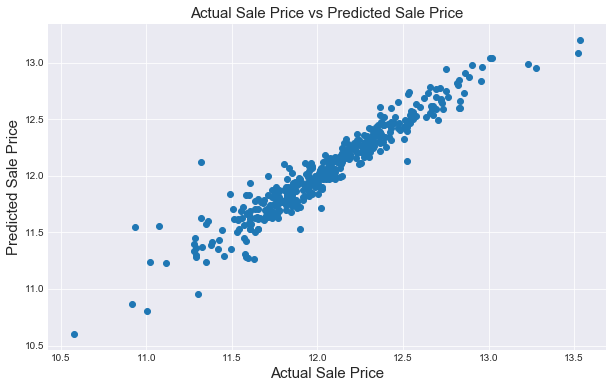

In [66]:
plt.figure(figsize=(10,6))
plt.scatter(ytest, xgbreg_pred)
plt.title("Actual Sale Price vs Predicted Sale Price",fontsize=15)
plt.xlabel("Actual Sale Price",fontsize=15)
plt.ylabel("Predicted Sale Price",fontsize=15);

**Cross Validation:**

In [68]:
scores = cross_val_score(xgbreg, train_df, y_train, 
                         cv=5,scoring="mean_squared_error")
print("Cross Validation Root Mean Squred Error: %0.5f (+/- %0.3f)" % (
                 np.sqrt(-scores.mean()), scores.std() * 2))

Cross Validation Root Mean Squred Error: 0.11863 (+/- 0.002)


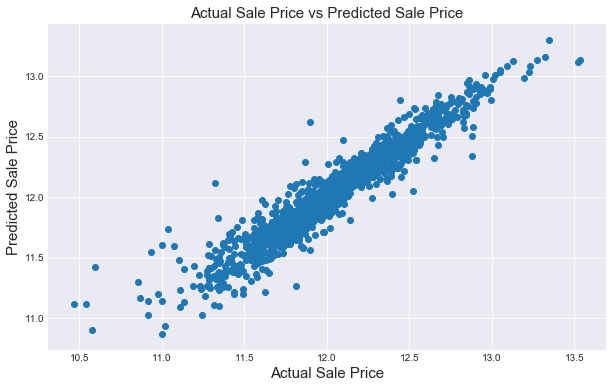

In [69]:
predictions = cross_val_predict(xgbreg, train_df, y_train, cv=5)
plt.figure(figsize=(10,6))
plt.scatter(y_train, predictions)
plt.title("Actual Sale Price vs Predicted Sale Price",fontsize=15)
plt.xlabel("Actual Sale Price",fontsize=15)
plt.ylabel("Predicted Sale Price",fontsize=15);

**Learning Curve:**

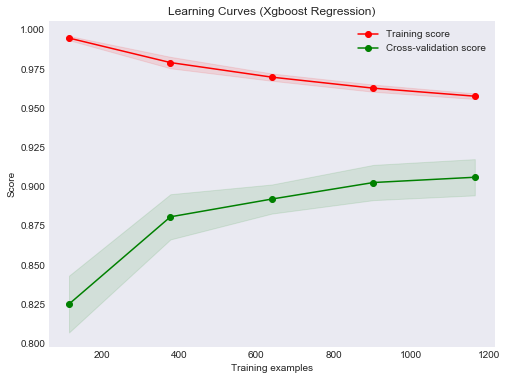

In [105]:
title = "Learning Curves (Xgboost Regression)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(XGBRegressor(), title, train_df, y_train, cv=cv, n_jobs=-1)
plt.show()

**Cell Report:**


* The Learning curve of Xgboost regression shows that cross validation Score(green line) increases with increase in training points. It reaches a pretty high score of 0.91 approximately and so we can see the model generalizes well. The Training Score(red line) decreases slightly and reaches approximately 0.95.Generally,we see it fits the model well and the cross validation score reaches a pretty high score. The cross validation score has two significant phases where the rates of change are different. One is the high positive rate of change which goes on uptil approximately 400 training points. The other is after 400 where the rate of increase is much lower. The positive rate of change which goes on uptil approximately 1200 training points and model suffers High varience problem. So adding more training points will definitely improve the score but beyond that adding more training points will not be very useful as the rate plateaus.

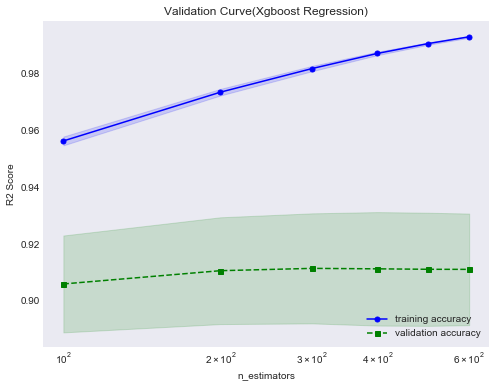

In [42]:
title="Validation Curve(Xgboost Regression)"
plot_validation_curve(XGBRegressor(),train_df, y_train,title,
                      param_name='n_estimators',
                      param_range=np.arange(100,700,100))

**Cell Report:**

* Validation curve showes that up to 400 estimators training and validation score is increasing but after 400 estimators training score is still increasing but validation score is not increasing. So we conclude that model will be over fitted.

**GridSearchCV:**

In [71]:
param_grid = { 'learning_rate': [0.1,.03, 0.05, .07],
              'gamma':[i/10.0 for i in range(3,6)],
              'max_depth': [5, 6, 7, 10],
              'min_child_weight': [4,5],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(XGBRegressor(),
                        param_grid,n_jobs=-1, cv=5,verbose=1,
                        scoring="mean_squared_error")
xgb_grid.fit(train_df, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 15.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'gamma': [0.3, 0.4, 0.5], 'subsample': [0.7], 'silent': [1], 'n_estimators': [500], 'colsample_bytree': [0.7], 'max_depth': [5, 6, 7, 10], 'min_child_weight': [4, 5], 'learning_rate': [0.1, 0.03, 0.05, 0.07]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='mean_squared_error', verbose=1)

In [72]:
print('Best Score RMSE:%0.5f'% np.sqrt((-xgb_grid.best_score_)))
print("Best Perameter:",xgb_grid.best_params_)

Best Score RMSE:0.12714
Best Perameter: {'gamma': 0.3, 'colsample_bytree': 0.7, 'silent': 1, 'subsample': 0.7, 'n_estimators': 500, 'max_depth': 10, 'min_child_weight': 5, 'learning_rate': 0.05}


## 12.11 LightGBM Regressor

In [43]:
from lightgbm import LGBMRegressor

In [44]:
lgbm = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=500,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [45]:
lgbm.fit(Xtrain,ytrain)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.2319, feature_fraction_seed=9,
       importance_type='split', learning_rate=0.05, max_bin=55,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_data_in_leaf=6, min_split_gain=0.0, min_sum_hessian_in_leaf=11,
       n_estimators=500, n_jobs=-1, num_leaves=5, objective='regression',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [28]:
lgbm_pred = lgbm.predict(Xtest)
rmse = np.sqrt(mean_squared_error(ytest, lgbm_pred))
print("LGBM Predicted Root Mean Squred Error:%0.5f" % rmse)

LGBM Predicted Root Mean Squred Error:0.12101


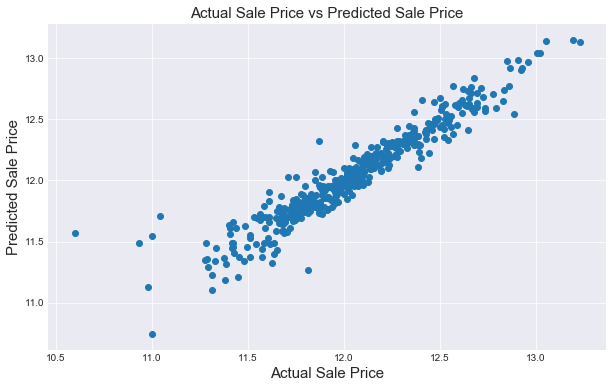

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(ytest, lgbm_pred)
plt.title("Actual Sale Price vs Predicted Sale Price",fontsize=15)
plt.xlabel("Actual Sale Price",fontsize=15)
plt.ylabel("Predicted Sale Price",fontsize=15);

**Cross Validation:**

In [30]:
scores = cross_val_score(lgbm, train_df, y_train, cv=5,
                         scoring="mean_squared_error")
print("Cross Validation Root Mean Squred Error: %0.5f (+/- %0.3f)" % (
             np.sqrt(-scores.mean()), scores.std() * 2))

Cross Validation Root Mean Squred Error: 0.11405 (+/- 0.002)


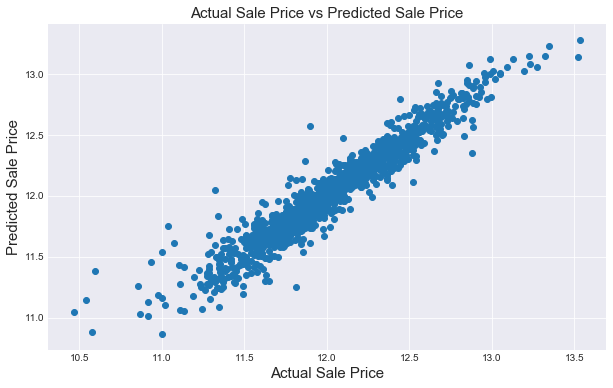

In [31]:
predictions = cross_val_predict(lgbm, train_df, y_train, cv=5)
plt.figure(figsize=(10,6))
plt.scatter(y_train, predictions)
plt.title("Actual Sale Price vs Predicted Sale Price",fontsize=15)
plt.xlabel("Actual Sale Price",fontsize=15)
plt.ylabel("Predicted Sale Price",fontsize=15);

**Learning Curve:**

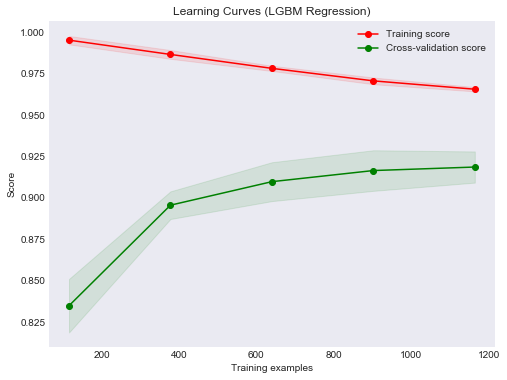

In [35]:
title = "Learning Curves (LGBM Regression)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(lgbm, title, train_df, y_train, cv=cv, n_jobs=-1)
plt.show()

**Cell Report:**
* The Learning curve of LGBM regression shows that cross validation Score(green line) increases with increase in training points. It reaches a pretty high score of 0.91 approximately and so we can see the model generalizes well. The Training Score(red line) decreases slightly and reaches approximately to 0.96.Generally,we see it fits the model well and the cross validation score reaches a pretty high score. The cross validation score has two significant phases where the rates of change are different. One is the high positive rate of change which goes on uptil approximately 400 training points. The other is after 400 where the rate of increase is much lower. The positive rate of change which goes on uptil approximately 1200 training points and model suffers High varience problem. So adding more training points will definitely improve the score but beyond that adding more training points will not be very useful as the rate plateaus.

**Validation Curve:**

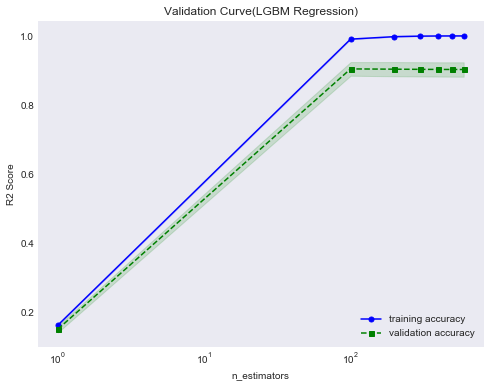

In [48]:
title="Validation Curve(LGBM Regression)"
plot_validation_curve(LGBMRegressor(),train_df, y_train,title,
                      param_name='n_estimators',
                      param_range=np.arange(1,700,100))

**Cell Report:** Validation Curve showes that after 200 estimators model is going to be overfitted.

**GridSearchCV:**

In [49]:
param_grid = { 'n_estimators': [200],
              'learning_rate': [0.01, 0.1, 1],
             'num_leaves':range(10,30,10)
             }

lgbm_grid = GridSearchCV(LGBMRegressor(), param_grid,
                         n_jobs=-1, cv=5,verbose=1,
                         scoring="mean_squared_error")
lgbm_grid.fit(train_df, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.1, 1], 'n_estimators': [200], 'num_leaves': range(10, 30, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='mean_squared_error', verbose=1)

In [50]:
print('Best Score RMSE:%0.5f'% np.sqrt((-lgbm_grid.best_score_)))
print("Best Perameter:",lgbm_grid.best_params_)

Best Score RMSE:0.11925
Best Perameter: {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 10}


## 12.12 Regression Model Summary

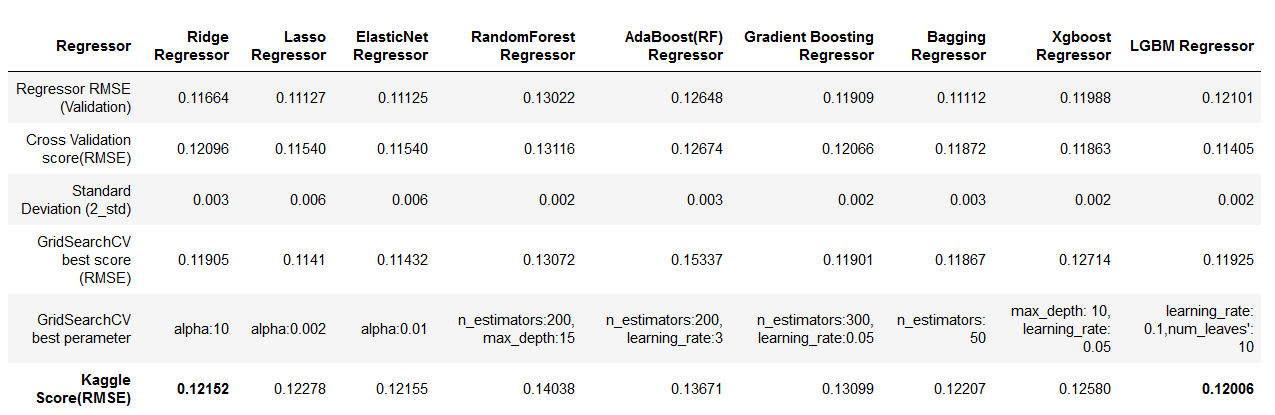

In [2]:
from PIL import Image
im=Image.open("regression_summary.png")
im

**Cell Report:** From the Model Summary it has been seen that best Kaggle Score(RMSE) from LGBM Regressor and 2nd best is Ridge Regressor.

# 13 Kaggle Score Improvement

## 13.1 Stacking with Averaging base Models

In [51]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [52]:
def rmsle_cv(model):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse = np.sqrt(-cross_val_score(model, train_df, y_train,
                                    scoring="neg_mean_squared_error", cv=cv))
    return rmse

### 13.1.1 Base Regression Models
    1. Lasso Regression
    2. Kernel Ridge Regression
    3. Elastic Net Regression
    4. Gradient Boosting Regression
    5. XGBoost
    6. Light GBM

In [53]:
#1
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
#2
k_ridge = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
#3
Elasnet= make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, 
                                                  l1_ratio=.9, random_state=3))
#4
gradboost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
#5
xgboost = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,seed=7, nthread = -1)
#6
lgbm = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

**Model Averaging Class:**

In [54]:
#Average Based models class

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

    
# Averaged base models score

averaged_models = AveragingModels(models = (Elasnet,xgboost,lasso,k_ridge))

score = rmsle_cv(averaged_models)
print("Averaged base models score: {:.4f} ({:.4f})\n".format(
                        score.mean(), score.std()))

Averaged base models score: 0.1094 (0.0113)



**Averaging Model Prediction:**

In [57]:
averaged_models.fit(train_df, y_train)
stacked_train_pred = averaged_models.predict(train_df)
stacked_pred = np.expm1(averaged_models.predict(test_df))
print("Average model train RMSE:",np.sqrt(mean_squared_error(y_train,
                                                        stacked_train_pred)))

Average model train RMSE: 0.07829232145295956


**Single Model Prediction:**

In [60]:
# XGBoost
xgboost.fit(train_df, y_train)
xgb_train_pred = xgboost.predict(train_df)
xgb_pred = np.expm1(xgboost.predict(test_df))
print("Xgboost train RMSE:",np.sqrt(mean_squared_error(y_train, xgb_train_pred)))

# LightGBM
lgbm.fit(train_df, y_train)
lgb_train_pred = lgbm.predict(train_df)
lgb_pred = np.expm1(lgbm.predict(test_df))
print("LightGBM train RMSE:",np.sqrt(mean_squared_error(y_train, lgb_train_pred)))

Xgboost train RMSE: 0.07693990129074234
LightGBM train RMSE: 0.0685098574701735


**Multiplication of prediction with weight**

The weight is chosen by following trail and error process. Finall conclusion is that stacked prediction is multiplyied by 0.7, Xgboost by 0.15, and LGBM by 0.15.

In [62]:
# Ensembled Predictions:
ensemble = stacked_pred*0.70 +xgb_pred*0.15 + lgb_pred*0.15

In [63]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('Avg_submission.csv',index=False)

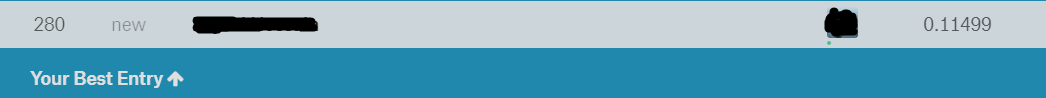

In [110]:
from PIL import Image
im=Image.open("Avg_submission.png")
im

**Cell Report:**


* It has been seen that by averaging the models, kaggle score has much improved. It is placed on ledarboard 280th position that is top 7%. Farther, score can be improved by applying more level of stacking with base learner and meta learner.